Cell 1: 라이브러리 Import 및 기본 설정

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# 시드 설정 (재현 가능한 결과)
np.random.seed(42)

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

print("=== Chronos 시계열 데이터 생성 시스템 ===")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print("라이브러리 로드 완료")

=== Chronos 시계열 데이터 생성 시스템 ===
NumPy version: 1.26.4
Pandas version: 2.2.2
라이브러리 로드 완료


Cell 2: 영업일 캘린더 생성

In [2]:
class BusinessCalendar:
    def __init__(self, start_date='2023-01-02', end_date='2024-12-30'):
        self.start_date = pd.to_datetime(start_date)
        self.end_date = pd.to_datetime(end_date)
        
        # 영업일 생성 (주말 제외)
        self.business_days = pd.bdate_range(
            start=self.start_date,
            end=self.end_date
        )
        
        # 한국 공휴일 (2023-2024년 주요 공휴일)
        korean_holidays = [
            # 2023년
            '2023-01-01', '2023-01-22', '2023-01-23', '2023-01-24',  # 신정, 설날
            '2023-03-01', '2023-05-05', '2023-05-27', '2023-06-06',  # 삼일절, 어린이날, 부처님오신날, 현충일
            '2023-08-15', '2023-09-28', '2023-09-29', '2023-09-30', # 광복절, 추석
            '2023-10-03', '2023-10-09', '2023-12-25',               # 개천절, 한글날, 성탄절
            
            # 2024년  
            '2024-01-01', '2024-02-09', '2024-02-10', '2024-02-12', # 신정, 설날
            '2024-03-01', '2024-05-05', '2024-05-15', '2024-06-06', # 삼일절, 어린이날, 부처님오신날, 현충일
            '2024-08-15', '2024-09-16', '2024-09-17', '2024-09-18', # 광복절, 추석
            '2024-10-03', '2024-10-09', '2024-12-25'                # 개천절, 한글날, 성탄절
        ]
        
        holiday_dates = pd.to_datetime(korean_holidays)
        self.business_days = self.business_days.difference(holiday_dates)
        
        print(f"총 영업일 수: {len(self.business_days)}일")
        print(f"시작일: {self.business_days[0].strftime('%Y-%m-%d')}")
        print(f"종료일: {self.business_days[-1].strftime('%Y-%m-%d')}")
        
    def get_day_characteristics(self, date):
        """요일별 특성 반환"""
        day_of_week = date.weekday()
        
        characteristics = {
            0: {'name': 'Monday', 'energy': 0.85, 'stress': 1.1, 'social': 0.9},
            1: {'name': 'Tuesday', 'energy': 1.0, 'stress': 1.0, 'social': 1.0},
            2: {'name': 'Wednesday', 'energy': 1.05, 'stress': 0.95, 'social': 1.05},
            3: {'name': 'Thursday', 'energy': 1.0, 'stress': 1.0, 'social': 1.0},
            4: {'name': 'Friday', 'energy': 0.9, 'stress': 0.8, 'social': 1.15}
        }
        
        return characteristics.get(day_of_week, characteristics[1])

# 캘린더 생성
calendar = BusinessCalendar()

class IndividualCharacteristics:
    def __init__(self, employee_id, persona_code):
        self.employee_id = employee_id
        self.persona_code = persona_code
        
        # 직원 ID 기반 시드 설정 (재현 가능하지만 개인별 고유)
        np.random.seed(int(str(employee_id)[-4:]))  # 직원ID 마지막 4자리 활용
        
        self.individual_traits = self._generate_individual_traits()
        
        # 시드 복원
        np.random.seed(42)
    
    def _generate_individual_traits(self):
        """개인별 고유 특성 생성"""
        
        traits = {
            # 기본 성향 편향 (-0.2 ~ +0.2 범위)
            'work_intensity_bias': np.random.uniform(-0.2, 0.2),
            'social_tendency_bias': np.random.uniform(-0.2, 0.2),
            'stress_sensitivity_bias': np.random.uniform(-0.2, 0.2),
            'routine_preference_bias': np.random.uniform(-0.2, 0.2),
            
            # 변동성 개인차 (0.5 ~ 1.5배)
            'volatility_multiplier': np.random.uniform(0.5, 1.5),
            
            # 반응 속도 차이 (페르소나 변화가 얼마나 빨리/늦게 나타나는가)
            'change_rate_multiplier': np.random.uniform(0.7, 1.3),
            
            # 특정 변수에 대한 개인적 민감도
            'login_hours_sensitivity': np.random.uniform(0.8, 1.2),
            'communication_sensitivity': np.random.uniform(0.8, 1.2),
            'social_eating_sensitivity': np.random.uniform(0.8, 1.2),
            'stress_eating_tendency': np.random.uniform(0.6, 1.4),
            
            # 페르소나별 특화 개인차
            'persona_specific_traits': self._get_persona_specific_traits()
        }
        
        return traits
    
    def _get_persona_specific_traits(self):
        """페르소나별 특화된 개인 특성"""
        
        if self.persona_code == 'P01_burnout':
            return {
                'burnout_trigger_threshold': np.random.uniform(0.6, 0.9),  # 번아웃 촉발 임계점
                'recovery_difficulty': np.random.uniform(0.7, 1.0),        # 회복 어려움 정도
                'isolation_preference': np.random.uniform(0.5, 1.0),       # 고립 선호도
                'workaholic_tendency': np.random.uniform(0.6, 1.0)         # 워커홀릭 성향
            }
        elif self.persona_code == 'S02_rising_star':
            return {
                'ambition_level': np.random.uniform(0.8, 1.0),             # 야망 수준
                'networking_skill': np.random.uniform(0.7, 1.0),          # 네트워킹 능력
                'innovation_drive': np.random.uniform(0.8, 1.0),          # 혁신 추진력
                'leadership_emergence_rate': np.random.uniform(0.8, 1.2)   # 리더십 발현 속도
            }
        elif self.persona_code == 'S01_anchor':
            return {
                'consistency_strength': np.random.uniform(0.9, 1.0),       # 일관성 강도
                'reliability_factor': np.random.uniform(0.95, 1.0),       # 신뢰성 팩터
                'change_resistance': np.random.uniform(0.8, 1.0),         # 변화 저항성
                'team_loyalty': np.random.uniform(0.9, 1.0)               # 팀 충성도
            }
        else:
            return {'adaptability': np.random.uniform(0.7, 1.0)}

# 사용 예시
individual_char = IndividualCharacteristics(1001, 'P01_burnout')
print("개인별 특성 생성 시스템 완료")
print(f"직원 1001의 특성 샘플:")
for key, value in list(individual_char.individual_traits.items())[:5]:
    print(f"  {key}: {value:.3f}")

총 영업일 수: 497일
시작일: 2023-01-02
종료일: 2024-12-30
개인별 특성 생성 시스템 완료
직원 1001의 특성 샘플:
  work_intensity_bias: -0.078
  social_tendency_bias: -0.094
  stress_sensitivity_bias: -0.122
  routine_preference_bias: -0.028
  volatility_multiplier: 0.523


Cell 3: 페르소나별 공간 이용 패턴 정의

In [3]:
class ComprehensivePersonaPatterns:
    def __init__(self):
        self.patterns = {
            # 고위험군
            'P01_burnout': {
                'description': '번아웃에 직면한 직원',
                'work_focused_ratio': {'stage1': 0.70, 'stage2': 0.58, 'stage3': 0.42, 'volatility': 0.15},
                'meeting_collaboration_ratio': {'stage1': 0.18, 'stage2': 0.12, 'stage3': 0.08, 'volatility': 0.08},
                'social_dining_ratio': {'stage1': 0.08, 'stage2': 0.05, 'stage3': 0.03, 'volatility': 0.03},
                'break_relaxation_ratio': {'stage1': 0.03, 'stage2': 0.18, 'stage3': 0.37, 'volatility': 0.12},
                'shared_work_ratio': {'stage1': 0.01, 'stage2': 0.07, 'stage3': 0.10, 'volatility': 0.05},
                
                # Chronos 시계열 변수들
                'core_task_volume': {'stage1': 0.75, 'stage2': 0.55, 'stage3': 0.35, 'trend': -0.001, 'volatility': 0.25},
                'system_login_hours': {'stage1': 9.5, 'stage2': 11.2, 'stage3': 7.8, 'trend': 0.01, 'volatility': 0.35},
                'after_hours_activity': {'stage1': 0.25, 'stage2': 0.35, 'stage3': 0.15, 'volatility': 0.20},
                'internal_comm_volume': {'stage1': 25, 'stage2': 15, 'stage3': 8, 'trend': -0.005, 'volatility': 8},
                'meeting_participation': {'stage1': 0.8, 'stage2': 0.6, 'stage3': 0.3, 'volatility': 0.15},
                'job_board_access': {'stage1': 0.0, 'stage2': 0.1, 'stage3': 0.8, 'volatility': 0.3},
                'hr_portal_access': {'stage1': 0.0, 'stage2': 0.05, 'stage3': 0.6, 'volatility': 0.25}
            },
            
            'P02_onboarding_failure': {
                'description': '온보딩에 실패한 직원',
                'work_focused_ratio': {'base': 0.35, 'volatility': 0.20, 'erratic': True},
                'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.08, 'passive_attendance': True},
                'social_dining_ratio': {'base': 0.04, 'volatility': 0.02, 'isolation': True},
                'break_relaxation_ratio': {'base': 0.25, 'volatility': 0.15, 'anxiety_refuge': True},
                'shared_work_ratio': {'base': 0.21, 'volatility': 0.12, 'confusion_seeking': True},
                
                'core_task_volume': {'base': 0.3, 'trend': -0.002, 'volatility': 0.35},
                'system_login_hours': {'base': 6.8, 'volatility': 1.8, 'inconsistent': True},
                'after_hours_activity': {'base': 0.1, 'volatility': 0.15},
                'internal_comm_volume': {'base': 12, 'volatility': 6, 'help_seeking_bursts': True},
                'meeting_participation': {'base': 0.4, 'volatility': 0.2},
                'job_board_access': {'base': 0.3, 'volatility': 0.2, 'early_activation': True},
                'hr_portal_access': {'base': 0.1, 'volatility': 0.1}
            },
            
            'P03_career_stagnation': {
                'description': '성장이 정체된 직원',
                'work_focused_ratio': {'base': 0.62, 'volatility': 0.05, 'routine_work': True},
                'meeting_collaboration_ratio': {'base': 0.12, 'volatility': 0.03, 'minimal_participation': True},
                'social_dining_ratio': {'base': 0.08, 'volatility': 0.02, 'habitual_meals': True},
                'break_relaxation_ratio': {'base': 0.12, 'volatility': 0.04, 'boredom_breaks': True},
                'shared_work_ratio': {'base': 0.06, 'volatility': 0.02, 'reluctant_collaboration': True},
                
                'core_task_volume': {'base': 0.65, 'trend': -0.0001, 'volatility': 0.08},
                'system_login_hours': {'base': 8.3, 'volatility': 0.4, 'clock_watching': True},
                'after_hours_activity': {'base': 0.15, 'trend': -0.0002, 'volatility': 0.10},
                'internal_comm_volume': {'base': 18, 'trend': -0.002, 'volatility': 4},
                'meeting_participation': {'base': 0.6, 'volatility': 0.05},
                'job_board_access': {'base': 0.2, 'periodic_spikes': True, 'volatility': 0.15},
                'hr_portal_access': {'base': 0.05, 'volatility': 0.05}
            },
            
            'P04_under_compensated': {
                'description': '저평가된 직원',
                'work_focused_ratio': {'base': 0.68, 'volatility': 0.06},
                'meeting_collaboration_ratio': {'base': 0.16, 'volatility': 0.04},
                'social_dining_ratio': {'base': 0.09, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.05, 'volatility': 0.02},
                'shared_work_ratio': {'base': 0.02, 'volatility': 0.01},
                
                'core_task_volume': {'base': 0.75, 'volatility': 0.10},
                'system_login_hours': {'base': 8.5, 'volatility': 0.3},
                'after_hours_activity': {'base': 0.12, 'salary_season_drop': True, 'volatility': 0.08},
                'internal_comm_volume': {'base': 22, 'volatility': 4},
                'meeting_participation': {'base': 0.7, 'volatility': 0.05},
                'job_board_access': {'base': 0.1, 'salary_season_spike': True, 'volatility': 0.20},
                'hr_portal_access': {'base': 0.05, 'salary_season_spike': True, 'volatility': 0.15}
            },
            
            # 안정 및 몰입군
            'S01_anchor': {
                'description': '안정적인 핵심인재',
                'work_focused_ratio': {'base': 0.65, 'volatility': 0.03, 'consistent': True},
                'meeting_collaboration_ratio': {'base': 0.18, 'volatility': 0.02, 'reliable_participant': True},
                'social_dining_ratio': {'base': 0.12, 'volatility': 0.01, 'regular_social': True},
                'break_relaxation_ratio': {'base': 0.04, 'volatility': 0.01, 'minimal_breaks': True},
                'shared_work_ratio': {'base': 0.01, 'volatility': 0.01, 'focused_individual': True},
                
                'core_task_volume': {'base': 0.85, 'trend': 0.0001, 'volatility': 0.08},
                'system_login_hours': {'base': 8.5, 'volatility': 0.3, 'regular_schedule': True},
                'after_hours_activity': {'base': 0.05, 'volatility': 0.02},
                'internal_comm_volume': {'base': 22, 'volatility': 3, 'professional_communication': True},
                'meeting_participation': {'base': 0.85, 'volatility': 0.05},
                'job_board_access': {'base': 0.0, 'volatility': 0.01},
                'hr_portal_access': {'base': 0.01, 'volatility': 0.01}
            },
            
            'S02_rising_star': {
                'description': '라이징 스타',
                'work_focused_ratio': {'base': 0.58, 'volatility': 0.06, 'efficient_work': True},
                'meeting_collaboration_ratio': {'base': 0.25, 'trend': 0.0002, 'volatility': 0.04, 'leadership_growth': True},
                'social_dining_ratio': {'base': 0.10, 'volatility': 0.02, 'networking_meals': True},
                'break_relaxation_ratio': {'base': 0.03, 'volatility': 0.01, 'energy_focused': True},
                'shared_work_ratio': {'base': 0.04, 'trend': 0.0001, 'volatility': 0.03, 'innovation_spaces': True},
                
                'core_task_volume': {'base': 0.90, 'trend': 0.002, 'volatility': 0.10},
                'system_login_hours': {'base': 9.2, 'volatility': 0.6, 'flexible_intensity': True},
                'after_hours_activity': {'base': 0.35, 'voluntary_overtime': True, 'volatility': 0.15},
                'internal_comm_volume': {'base': 35, 'trend': 0.01, 'volatility': 5},
                'meeting_participation': {'base': 0.90, 'trend': 0.001, 'volatility': 0.08},
                'job_board_access': {'base': 0.05, 'volatility': 0.05, 'market_awareness': True},
                'hr_portal_access': {'base': 0.02, 'volatility': 0.02}
            },
            
            'S03_intrinsically_motivated': {
                'description': '내재적 동기가 높은 직원',
                'work_focused_ratio': {'base': 0.70, 'volatility': 0.04},
                'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.03},
                'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.05, 'volatility': 0.02},
                'shared_work_ratio': {'base': 0.02, 'volatility': 0.01},
                
                'core_task_volume': {'base': 0.88, 'volatility': 0.05, 'deep_focus': True},
                'system_login_hours': {'base': 8.8, 'volatility': 0.4},
                'after_hours_activity': {'base': 0.20, 'passion_driven': True, 'volatility': 0.12},
                'internal_comm_volume': {'base': 18, 'volatility': 3, 'task_focused': True},
                'meeting_participation': {'base': 0.70, 'volatility': 0.06},
                'job_board_access': {'base': 0.02, 'volatility': 0.02},
                'hr_portal_access': {'base': 0.01, 'volatility': 0.01}
            },
            
            # 중립 및 관망군
            'N01_coaster': {
                'description': '현상만 유지하는 직원',
                'work_focused_ratio': {'base': 0.60, 'volatility': 0.02, 'minimal_effort': True},
                'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.02},
                'social_dining_ratio': {'base': 0.10, 'volatility': 0.01},
                'break_relaxation_ratio': {'base': 0.12, 'volatility': 0.02},
                'shared_work_ratio': {'base': 0.03, 'volatility': 0.01},
                
                'core_task_volume': {'base': 0.55, 'volatility': 0.05, 'predictable': True},
                'system_login_hours': {'base': 8.0, 'volatility': 0.2, 'clock_watching': True},
                'after_hours_activity': {'base': 0.05, 'volatility': 0.02},
                'internal_comm_volume': {'base': 15, 'volatility': 2},
                'meeting_participation': {'base': 0.60, 'volatility': 0.03},
                'job_board_access': {'base': 0.05, 'performance_review_spikes': True, 'volatility': 0.08},
                'hr_portal_access': {'base': 0.02, 'volatility': 0.02}
            },
            
            'N02_competent_malcontent': {
                'description': '유능하지만 불만이 많은 직원',
                'work_focused_ratio': {'base': 0.68, 'volatility': 0.08},
                'meeting_collaboration_ratio': {'base': 0.10, 'volatility': 0.05, 'selective_participation': True},
                'social_dining_ratio': {'base': 0.06, 'volatility': 0.03, 'social_withdrawal': True},
                'break_relaxation_ratio': {'base': 0.08, 'volatility': 0.04},
                'shared_work_ratio': {'base': 0.08, 'volatility': 0.05},
                
                'core_task_volume': {'base': 0.85, 'volatility': 0.12, 'high_performance': True},
                'system_login_hours': {'base': 8.2, 'volatility': 0.5},
                'after_hours_activity': {'base': 0.08, 'volatility': 0.08},
                'internal_comm_volume': {'base': 12, 'volatility': 6, 'critical_communication': True},
                'meeting_participation': {'base': 0.55, 'volatility': 0.15},
                'job_board_access': {'base': 0.15, 'trigger_driven_spikes': True, 'volatility': 0.25},
                'hr_portal_access': {'base': 0.05, 'volatility': 0.08}
            },
            
            'N03_new_parent': {
                'description': '신규 부모',
                'work_focused_ratio': {'base': 0.62, 'volatility': 0.06},
                'meeting_collaboration_ratio': {'base': 0.18, 'volatility': 0.04},
                'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.08, 'volatility': 0.03},
                'shared_work_ratio': {'base': 0.04, 'volatility': 0.02},
                
                'core_task_volume': {'base': 0.70, 'volatility': 0.15, 'time_constrained': True},
                'system_login_hours': {'base': 7.5, 'volatility': 0.8, 'flexible_schedule': True},
                'after_hours_activity': {'base': 0.02, 'volatility': 0.02, 'family_priority': True},
                'internal_comm_volume': {'base': 20, 'volatility': 4},
                'meeting_participation': {'base': 0.75, 'volatility': 0.10},
                'job_board_access': {'base': 0.03, 'volatility': 0.03},
                'hr_portal_access': {'base': 0.08, 'family_benefits_focus': True, 'volatility': 0.05}
            }
        }
    
    def get_pattern(self, persona_code):
        return self.patterns.get(persona_code, self.patterns['S01_anchor'])

Cell 4: 노이즈 생성기 클래스

In [4]:
class RealisticNoiseGenerator:
    def __init__(self):
        self.noise_cache = {}
    
    def gaussian_noise(self, base_value, intensity=0.1):
        """가우시안 노이즈"""
        return base_value * (1 + np.random.normal(0, intensity))
    
    def behavioral_noise(self, base_value, persona_code, volatility=0.1):
        """페르소나별 행동 패턴 노이즈"""
        behavioral_factors = {
            'P01_burnout': {'mood_swings': 0.3, 'inconsistency': 0.4},
            'P02_onboarding_failure': {'confusion': 0.35, 'anxiety': 0.25},
            'S01_anchor': {'stability': 0.05, 'consistency': 0.95},
            'S02_rising_star': {'enthusiasm': 0.15, 'innovation': 0.1}
        }
        
        factors = behavioral_factors.get(persona_code, {'default': 0.1})
        
        noise_multiplier = 1.0
        for factor_name, intensity in factors.items():
            if np.random.random() < intensity:
                if factor_name in ['mood_swings', 'confusion', 'anxiety']:
                    noise_multiplier *= np.random.uniform(0.7, 1.3)
                elif factor_name in ['enthusiasm', 'innovation']:
                    noise_multiplier *= np.random.uniform(1.0, 1.2)
        
        result = base_value * noise_multiplier * (1 + np.random.normal(0, volatility))
        return max(0.01, min(0.98, result))  # 범위 제한
    
    def environmental_noise(self, base_value, date):
        """환경적 요인 노이즈"""
        multiplier = 1.0
        
        # 계절적 요인
        month = date.month
        if month in [12, 1, 2]:  # 겨울
            multiplier *= 0.95
        elif month in [6, 7, 8]:  # 여름
            multiplier *= 0.92
        
        # 요일 효과
        if date.weekday() == 0:  # 월요일
            multiplier *= 0.88
        elif date.weekday() == 4:  # 금요일
            multiplier *= 0.93
        
        # 월말 효과
        if date.day >= 25:
            multiplier *= 1.08
        
        return base_value * multiplier

# 노이즈 생성기 초기화
noise_generator = RealisticNoiseGenerator()
print("노이즈 생성기 초기화 완료")

def generate_work_engagement_variables(persona_code, day_index, date, pattern):
    """업무 몰입도 변수 생성"""
    
    engagement_vars = {}
    
    # Digital Work Engagement Score 생성
    engagement_config = pattern.get('digital_work_engagement', {'base': 0.7, 'volatility': 0.1})
    
    if 'stage1' in engagement_config:  # P01 burnout 같은 단계적 패턴
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_engagement = engagement_config['stage1']
        elif progress < 0.66:
            base_engagement = engagement_config['stage2']  
        else:
            base_engagement = engagement_config['stage3']
    else:
        base_engagement = engagement_config['base']
        if 'trend' in engagement_config:
            base_engagement += engagement_config['trend'] * day_index
    
    # 환경적 요인 적용
    day_chars = calendar.get_day_characteristics(date)
    base_engagement *= day_chars['energy']
    
    # 노이즈 적용
    volatility = engagement_config.get('volatility', 0.1)
    engagement_vars['digital_work_engagement'] = noise_generator.behavioral_noise(
        base_engagement, persona_code, volatility
    )
    engagement_vars['digital_work_engagement'] = max(0.1, min(1.0, engagement_vars['digital_work_engagement']))
    
    # System Login Hours 생성
    hours_config = pattern.get('system_login_hours', {'base': 8.5, 'volatility': 0.5})
    
    if 'stage1' in hours_config:  # 단계적 패턴
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_hours = hours_config['stage1']
        elif progress < 0.66:
            base_hours = hours_config['stage2']
        else:
            base_hours = hours_config['stage3']
    else:
        base_hours = hours_config['base']
    
    # 요일 효과
    base_hours *= day_chars['energy']
    
    # 특수 패턴 적용
    if hours_config.get('irregular_pattern', False) and persona_code == 'P01_burnout':
        if day_index > 200:  # 후기 단계
            base_hours += np.random.choice([-2, -1, 0, 3, 4], p=[0.2, 0.3, 0.2, 0.2, 0.1])
    
    volatility = hours_config.get('volatility', 0.5)
    engagement_vars['system_login_hours'] = noise_generator.gaussian_noise(base_hours, volatility/base_hours)
    engagement_vars['system_login_hours'] = max(3.0, min(16.0, engagement_vars['system_login_hours']))
    
    return engagement_vars

def generate_social_variables(persona_code, day_index, date, pattern):
    """사회적 관계 변수 생성"""
    
    social_vars = {}
    day_chars = calendar.get_day_characteristics(date)
    
    # Internal Communication Volume
    comm_config = pattern.get('internal_comm_volume', {'base': 20, 'volatility': 5})
    
    if 'stage1' in comm_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_comm = comm_config['stage1']
        elif progress < 0.66:
            base_comm = comm_config['stage2']
        else:
            base_comm = comm_config['stage3']
    else:
        base_comm = comm_config['base']
        if 'trend' in comm_config:
            base_comm += comm_config['trend'] * day_index
    
    # 요일 효과 (월요일 높음, 금요일 낮음)
    base_comm *= day_chars['social']
    
    # 특수 패턴
    if comm_config.get('help_seeking_bursts', False):
        if np.random.random() < 0.15:  # 15% 확률로 도움 요청 폭증
            base_comm *= np.random.uniform(2.0, 3.5)
    
    volatility = comm_config.get('volatility', 5)
    social_vars['internal_comm_volume'] = max(0, int(
        noise_generator.gaussian_noise(base_comm, volatility/base_comm)
    ))
    
    # Cafeteria Usage
    cafe_config = pattern.get('cafeteria_usage', {'base': 1.0, 'volatility': 0.2})
    
    if 'stage1' in cafe_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_cafe = cafe_config['stage1']
        elif progress < 0.66:
            base_cafe = cafe_config['stage2']
        else:
            base_cafe = cafe_config['stage3']
    else:
        base_cafe = cafe_config['base']
    
    # 금요일 사회적 식사 증가
    if date.weekday() == 4:
        base_cafe *= 1.2
    
    volatility = cafe_config.get('volatility', 0.2)
    social_vars['cafeteria_usage'] = max(0, min(3, 
        noise_generator.gaussian_noise(base_cafe, volatility)
    ))
    
    # Convenience Food Usage
    conv_config = pattern.get('convenience_food_usage', {'base': 1.5, 'volatility': 0.5})
    
    if 'stage1' in conv_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_conv = conv_config['stage1']
        elif progress < 0.66:
            base_conv = conv_config['stage2']
        else:
            base_conv = conv_config['stage3']
    else:
        base_conv = conv_config['base']
    
    # 스트레스와 상관관계
    if conv_config.get('stress_eating', False):
        stress_multiplier = 1 + (day_chars['stress'] - 1) * 0.8
        base_conv *= stress_multiplier
    
    volatility = conv_config.get('volatility', 0.5)
    social_vars['convenience_food_usage'] = max(0, min(8,
        noise_generator.gaussian_noise(base_conv, volatility/max(base_conv, 0.1))
    ))
    
    return social_vars

print("추가 변수 생성 함수 정의 완료")

노이즈 생성기 초기화 완료
추가 변수 생성 함수 정의 완료


Cell 5: 공간 비율 생성 함수

In [5]:
# Cell 5: 완전한 개인화 변수 생성 시스템 (현실적 변수만 포함)

# 1. 페르소나 패턴 객체 생성 (의존성 해결)
class ComprehensivePersonaPatterns:
    def __init__(self):
        self.patterns = {
            # 고위험군
            'P01_burnout': {
                'description': '번아웃에 직면한 직원',
                'work_focused_ratio': {'stage1': 0.70, 'stage2': 0.58, 'stage3': 0.42, 'volatility': 0.15},
                'meeting_collaboration_ratio': {'stage1': 0.18, 'stage2': 0.12, 'stage3': 0.08, 'volatility': 0.08},
                'social_dining_ratio': {'stage1': 0.08, 'stage2': 0.05, 'stage3': 0.03, 'volatility': 0.03},
                'break_relaxation_ratio': {'stage1': 0.03, 'stage2': 0.18, 'stage3': 0.37, 'volatility': 0.12},
                'shared_work_ratio': {'stage1': 0.01, 'stage2': 0.07, 'stage3': 0.10, 'volatility': 0.05},
                
                # 기존 변수들
                'digital_work_engagement': {'stage1': 0.75, 'stage2': 0.55, 'stage3': 0.35, 'volatility': 0.20},
                'system_login_hours': {'stage1': 9.5, 'stage2': 11.2, 'stage3': 7.8, 'volatility': 1.5},
                'internal_comm_volume': {'stage1': 25, 'stage2': 15, 'stage3': 8, 'volatility': 8},
                'cafeteria_usage': {'stage1': 1.2, 'stage2': 0.8, 'stage3': 0.3, 'volatility': 0.4},
                'convenience_food_usage': {'stage1': 1.5, 'stage2': 3.2, 'stage3': 4.8, 'volatility': 1.2},
                'meeting_participation': {'stage1': 0.8, 'stage2': 0.6, 'stage3': 0.3, 'volatility': 0.15}
            },
            
            'P02_onboarding_failure': {
                'description': '온보딩에 실패한 직원',
                'work_focused_ratio': {'base': 0.35, 'volatility': 0.20},
                'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.08},
                'social_dining_ratio': {'base': 0.04, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.25, 'volatility': 0.15},
                'shared_work_ratio': {'base': 0.21, 'volatility': 0.12},
                
                'digital_work_engagement': {'base': 0.35, 'volatility': 0.25},
                'system_login_hours': {'base': 6.8, 'volatility': 1.8},
                'internal_comm_volume': {'base': 12, 'volatility': 6, 'help_seeking_bursts': True},
                'cafeteria_usage': {'base': 0.4, 'volatility': 0.2},
                'convenience_food_usage': {'base': 2.8, 'volatility': 1.0},
                'meeting_participation': {'base': 0.4, 'volatility': 0.2, 'passive_attendance': True}
            },
            
            'P03_career_stagnation': {
                'description': '성장이 정체된 직원',
                'work_focused_ratio': {'base': 0.62, 'volatility': 0.05},
                'meeting_collaboration_ratio': {'base': 0.12, 'volatility': 0.03},
                'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.12, 'volatility': 0.04},
                'shared_work_ratio': {'base': 0.06, 'volatility': 0.02},
                
                'digital_work_engagement': {'base': 0.58, 'volatility': 0.08},
                'system_login_hours': {'base': 8.3, 'volatility': 0.4},
                'internal_comm_volume': {'base': 18, 'trend': -0.002, 'volatility': 4},
                'cafeteria_usage': {'base': 0.9, 'volatility': 0.1},
                'convenience_food_usage': {'base': 1.1, 'volatility': 0.3},
                'meeting_participation': {'base': 0.6, 'volatility': 0.05}
            },
            
            'P04_under_compensated': {
                'description': '저평가된 직원',
                'work_focused_ratio': {'base': 0.68, 'volatility': 0.06},
                'meeting_collaboration_ratio': {'base': 0.16, 'volatility': 0.04},
                'social_dining_ratio': {'base': 0.09, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.05, 'volatility': 0.02},
                'shared_work_ratio': {'base': 0.02, 'volatility': 0.01},
                
                'digital_work_engagement': {'base': 0.72, 'volatility': 0.12},
                'system_login_hours': {'base': 8.5, 'volatility': 0.3},
                'internal_comm_volume': {'base': 22, 'volatility': 4},
                'cafeteria_usage': {'base': 1.0, 'volatility': 0.2},
                'convenience_food_usage': {'base': 1.3, 'volatility': 0.4},
                'meeting_participation': {'base': 0.7, 'volatility': 0.05}
            },
            
            # 안정 및 몰입군
            'S01_anchor': {
                'description': '안정적인 핵심인재',
                'work_focused_ratio': {'base': 0.65, 'volatility': 0.03},
                'meeting_collaboration_ratio': {'base': 0.18, 'volatility': 0.02},
                'social_dining_ratio': {'base': 0.12, 'volatility': 0.01},
                'break_relaxation_ratio': {'base': 0.04, 'volatility': 0.01},
                'shared_work_ratio': {'base': 0.01, 'volatility': 0.01},
                
                'digital_work_engagement': {'base': 0.82, 'volatility': 0.05},
                'system_login_hours': {'base': 8.5, 'volatility': 0.3},
                'internal_comm_volume': {'base': 22, 'volatility': 3},
                'cafeteria_usage': {'base': 1.0, 'volatility': 0.1},
                'convenience_food_usage': {'base': 0.8, 'volatility': 0.2},
                'meeting_participation': {'base': 0.85, 'volatility': 0.05, 'reliable_participant': True}
            },
            
            'S02_rising_star': {
                'description': '라이징 스타',
                'work_focused_ratio': {'base': 0.58, 'volatility': 0.06},
                'meeting_collaboration_ratio': {'base': 0.25, 'trend': 0.0002, 'volatility': 0.04},
                'social_dining_ratio': {'base': 0.10, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.03, 'volatility': 0.01},
                'shared_work_ratio': {'base': 0.04, 'trend': 0.0001, 'volatility': 0.03},
                
                'digital_work_engagement': {'base': 0.88, 'trend': 0.0001, 'volatility': 0.08},
                'system_login_hours': {'base': 9.2, 'volatility': 0.6},
                'internal_comm_volume': {'base': 35, 'trend': 0.01, 'volatility': 5},
                'cafeteria_usage': {'base': 1.3, 'volatility': 0.3},
                'convenience_food_usage': {'base': 1.2, 'volatility': 0.3},
                'meeting_participation': {'base': 0.90, 'trend': 0.001, 'volatility': 0.08}
            },
            
            'S03_intrinsically_motivated': {
                'description': '내재적 동기가 높은 직원',
                'work_focused_ratio': {'base': 0.70, 'volatility': 0.04},
                'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.03},
                'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.05, 'volatility': 0.02},
                'shared_work_ratio': {'base': 0.02, 'volatility': 0.01},
                
                'digital_work_engagement': {'base': 0.88, 'volatility': 0.05},
                'system_login_hours': {'base': 8.8, 'volatility': 0.4},
                'internal_comm_volume': {'base': 18, 'volatility': 3},
                'cafeteria_usage': {'base': 0.9, 'volatility': 0.15},
                'convenience_food_usage': {'base': 0.9, 'volatility': 0.25},
                'meeting_participation': {'base': 0.70, 'volatility': 0.06}
            },
            
            # 중립 및 관망군
            'N01_coaster': {
                'description': '현상만 유지하는 직원',
                'work_focused_ratio': {'base': 0.60, 'volatility': 0.02},
                'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.02},
                'social_dining_ratio': {'base': 0.10, 'volatility': 0.01},
                'break_relaxation_ratio': {'base': 0.12, 'volatility': 0.02},
                'shared_work_ratio': {'base': 0.03, 'volatility': 0.01},
                
                'digital_work_engagement': {'base': 0.55, 'volatility': 0.08},
                'system_login_hours': {'base': 8.0, 'volatility': 0.2},
                'internal_comm_volume': {'base': 15, 'volatility': 2},
                'cafeteria_usage': {'base': 0.9, 'volatility': 0.1},
                'convenience_food_usage': {'base': 1.2, 'volatility': 0.3},
                'meeting_participation': {'base': 0.60, 'volatility': 0.03}
            },
            
            'N02_competent_malcontent': {
                'description': '유능하지만 불만이 많은 직원',
                'work_focused_ratio': {'base': 0.68, 'volatility': 0.08},
                'meeting_collaboration_ratio': {'base': 0.10, 'volatility': 0.05},
                'social_dining_ratio': {'base': 0.06, 'volatility': 0.03},
                'break_relaxation_ratio': {'base': 0.08, 'volatility': 0.04},
                'shared_work_ratio': {'base': 0.08, 'volatility': 0.05},
                
                'digital_work_engagement': {'base': 0.75, 'volatility': 0.12},
                'system_login_hours': {'base': 8.2, 'volatility': 0.5},
                'internal_comm_volume': {'base': 12, 'volatility': 6},
                'cafeteria_usage': {'base': 0.7, 'volatility': 0.2},
                'convenience_food_usage': {'base': 1.4, 'volatility': 0.5},
                'meeting_participation': {'base': 0.55, 'volatility': 0.15}
            },
            
            'N03_new_parent': {
                'description': '신규 부모',
                'work_focused_ratio': {'base': 0.62, 'volatility': 0.06},
                'meeting_collaboration_ratio': {'base': 0.18, 'volatility': 0.04},
                'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                'break_relaxation_ratio': {'base': 0.08, 'volatility': 0.03},
                'shared_work_ratio': {'base': 0.04, 'volatility': 0.02},
                
                'digital_work_engagement': {'base': 0.70, 'volatility': 0.15},
                'system_login_hours': {'base': 7.5, 'volatility': 0.8},
                'internal_comm_volume': {'base': 20, 'volatility': 4},
                'cafeteria_usage': {'base': 0.8, 'volatility': 0.2},
                'convenience_food_usage': {'base': 1.1, 'volatility': 0.3},
                'meeting_participation': {'base': 0.75, 'volatility': 0.10}
            }
        }
    
    def get_pattern(self, persona_code):
        return self.patterns.get(persona_code, self.patterns['S01_anchor'])

# 페르소나 패턴 객체 생성
persona_patterns = ComprehensivePersonaPatterns()
print("페르소나 패턴 객체 생성 완료")

def generate_personalized_variables_realistic(employee_id, persona_code, day_index, date):
    """현실적인 변수만 생성하는 개인화된 함수"""
    
    # 개인 특성 로드
    individual = IndividualCharacteristics(employee_id, persona_code)
    traits = individual.individual_traits
    
    # 기본 패턴 로드
    pattern = persona_patterns.get_pattern(persona_code)
    all_vars = {}
    
    # 1. 공간별 비율 생성 (기존 유지)
    space_ratios = generate_space_ratios_personalized(
        persona_code, day_index, date, traits
    )
    all_vars.update(space_ratios)
    
    # 2. 업무 몰입도 변수 생성 (기존 유지)
    work_vars = generate_work_engagement_personalized(
        persona_code, day_index, date, pattern, traits
    )
    all_vars.update(work_vars)
    
    # 3. 사회적 변수 (기존 유지)
    social_vars = generate_social_variables_personalized(
        persona_code, day_index, date, pattern, traits
    )
    all_vars.update(social_vars)
    
    # 4. 현실적인 추가 지표만 생성
    realistic_vars = generate_realistic_behavioral_variables(
        persona_code, day_index, date, pattern, traits
    )
    all_vars.update(realistic_vars)
    
    return all_vars

def generate_realistic_behavioral_variables(persona_code, day_index, date, pattern, traits):
    """현실적으로 측정 가능한 행동 지표 생성"""
    
    realistic_vars = {}
    day_chars = calendar.get_day_characteristics(date)
    
    # 1. Meeting Participation (캘린더 기반으로 실제 측정 가능)
    meeting_config = pattern.get('meeting_participation', {'base': 0.7, 'volatility': 0.1})
    
    if 'stage1' in meeting_config:  # 단계적 패턴 (P01 burnout)
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_meeting = meeting_config['stage1']
        elif progress < 0.66:
            base_meeting = meeting_config['stage2']
        else:
            base_meeting = meeting_config['stage3']
    else:
        base_meeting = meeting_config['base']
        if 'trend' in meeting_config:
            base_meeting += meeting_config['trend'] * day_index
    
    # 개인별 특성 적용
    if traits:
        base_meeting *= (1 + traits.get('social_tendency_bias', 0) * 0.2)
    
    # 특수 패턴
    if meeting_config.get('passive_attendance', False):  # P02
        base_meeting *= 0.8  # 수동적 참석
    elif meeting_config.get('reliable_participant', False):  # S01
        volatility = 0.05  # 매우 안정적
    else:
        volatility = meeting_config.get('volatility', 0.1)
    
    realistic_vars['meeting_participation'] = max(0.0, min(1.0,
        noise_generator.behavioral_noise(base_meeting, persona_code, volatility)
    ))
    
    # 2. Internal Communication Volume (실제 측정 가능)
    comm_config = pattern.get('internal_comm_volume', {'base': 20, 'volatility': 5})
    
    if 'stage1' in comm_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_comm = comm_config['stage1']
        elif progress < 0.66:
            base_comm = comm_config['stage2']
        else:
            base_comm = comm_config['stage3']
    else:
        base_comm = comm_config['base']
        if 'trend' in comm_config:
            base_comm += comm_config['trend'] * day_index
    
    # 요일 효과 적용
    base_comm *= day_chars['social']
    
    # 개인별 특성 적용
    if traits:
        base_comm *= traits.get('communication_sensitivity', 1.0)
    
    # 특수 패턴
    if comm_config.get('help_seeking_bursts', False):
        if np.random.random() < 0.15:  # 15% 확률로 도움 요청 폭증
            base_comm *= np.random.uniform(2.0, 3.5)
    
    volatility = comm_config.get('volatility', 5)
    realistic_vars['internal_comm_volume'] = max(0, int(
        noise_generator.gaussian_noise(base_comm, volatility/max(base_comm, 1))
    ))
    
    return realistic_vars

def generate_space_ratios_personalized(persona_code, day_index, date, traits):
    """개인 특성이 반영된 공간 비율 생성"""
    
    # 기본 공간 비율 생성
    base_ratios = generate_space_ratios(persona_code, day_index, date)
    
    # 개인별 편향 적용
    personalized_ratios = {}
    
    for space, ratio in base_ratios.items():
        if space == 'work_focused_ratio':
            adjusted_ratio = ratio * (1 + traits.get('work_intensity_bias', 0))
            adjusted_ratio *= (1 + traits.get('routine_preference_bias', 0) * 0.3)
        elif space == 'social_dining_ratio':
            adjusted_ratio = ratio * (1 + traits.get('social_tendency_bias', 0))
            adjusted_ratio *= traits.get('social_eating_sensitivity', 1.0)
        elif space == 'break_relaxation_ratio':
            adjusted_ratio = ratio * (1 + traits.get('stress_sensitivity_bias', 0))
        else:
            adjusted_ratio = ratio
        
        # 변동성도 개인별로 조정
        volatility = 0.05 * traits.get('volatility_multiplier', 1.0)
        adjusted_ratio *= (1 + np.random.normal(0, volatility))
        
        personalized_ratios[space] = max(0.01, adjusted_ratio)
    
    # 정규화
    total = sum(personalized_ratios.values())
    personalized_ratios = {k: v/total for k, v in personalized_ratios.items()}
    
    return personalized_ratios

def generate_work_engagement_personalized(persona_code, day_index, date, pattern, traits):
    """개인화된 업무 몰입도 변수 생성"""
    
    work_vars = {}
    
    # Digital Work Engagement
    engagement_config = pattern.get('digital_work_engagement', {'base': 0.7})
    
    if 'stage1' in engagement_config:
        adjusted_day_index = day_index * traits.get('change_rate_multiplier', 1.0)
        progress = min(adjusted_day_index / 300, 1.0)
        
        if progress < 0.33:
            base_engagement = engagement_config['stage1']
        elif progress < 0.66:
            base_engagement = engagement_config['stage2']
        else:
            base_engagement = engagement_config['stage3']
    else:
        base_engagement = engagement_config['base']
        if 'trend' in engagement_config:
            base_engagement += engagement_config['trend'] * day_index
    
    # 개인별 특성 적용
    base_engagement *= (1 + traits.get('work_intensity_bias', 0) * 0.4)
    
    # 환경적 요인 적용
    day_chars = calendar.get_day_characteristics(date)
    base_engagement *= day_chars['energy']
    
    volatility = engagement_config.get('volatility', 0.1) * traits.get('volatility_multiplier', 1.0)
    work_vars['digital_work_engagement'] = max(0.1, min(1.0,
        noise_generator.gaussian_noise(base_engagement, volatility)
    ))
    
    # System Login Hours
    hours_config = pattern.get('system_login_hours', {'base': 8.5, 'volatility': 0.5})
    
    if 'stage1' in hours_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_hours = hours_config['stage1']
        elif progress < 0.66:
            base_hours = hours_config['stage2']
        else:
            base_hours = hours_config['stage3']
    else:
        base_hours = hours_config['base']
    
    # 개인별 특성 및 요일 효과
    base_hours *= traits.get('login_hours_sensitivity', 1.0)
    base_hours *= day_chars['energy']
    
    volatility = hours_config.get('volatility', 0.5)
    work_vars['system_login_hours'] = max(4.0, min(16.0,
        noise_generator.gaussian_noise(base_hours, volatility)
    ))
    
    return work_vars

def generate_social_variables_personalized(persona_code, day_index, date, pattern, traits):
    """개인화된 사회적 변수 생성"""
    
    social_vars = {}
    
    # Cafeteria Usage
    cafe_config = pattern.get('cafeteria_usage', {'base': 1.0, 'volatility': 0.2})
    
    if 'stage1' in cafe_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_cafe = cafe_config['stage1']
        elif progress < 0.66:
            base_cafe = cafe_config['stage2']
        else:
            base_cafe = cafe_config['stage3']
    else:
        base_cafe = cafe_config['base']
    
    # 금요일 사회적 식사 증가
    if date.weekday() == 4:
        base_cafe *= 1.2
    
    # 개인별 특성 적용
    base_cafe *= traits.get('social_eating_sensitivity', 1.0)
    
    social_vars['cafeteria_usage'] = max(0, min(3, 
        noise_generator.gaussian_noise(base_cafe, cafe_config.get('volatility', 0.2))
    ))
    
    # Convenience Food Usage
    conv_config = pattern.get('convenience_food_usage', {'base': 1.5, 'volatility': 0.5})
    
    if 'stage1' in conv_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_conv = conv_config['stage1']
        elif progress < 0.66:
            base_conv = conv_config['stage2']
        else:
            base_conv = conv_config['stage3']
    else:
        base_conv = conv_config['base']
    
    # 스트레스와 상관관계
    base_conv *= traits.get('stress_eating_tendency', 1.0)
    
    social_vars['convenience_food_usage'] = max(0, min(8,
        noise_generator.gaussian_noise(base_conv, conv_config.get('volatility', 0.5))
    ))
    
    return social_vars

print("Cell 5 - 현실적 개인화 변수 생성 함수 완료")

페르소나 패턴 객체 생성 완료
Cell 5 - 현실적 개인화 변수 생성 함수 완료


Cell 6: 단일 직원 시계열 생성 함수

In [6]:
# Cell 6: 셀 5에 맞춘 안전한 시계열 생성 함수 (의존성 체크 포함)

# 1. 의존성 체크 및 복구
try:
    # persona_patterns 객체가 존재하는지 확인
    test_pattern = persona_patterns.get_pattern('P01_burnout')
    print("기존 persona_patterns 객체 사용")
except NameError:
    # 없으면 다시 생성
    print("persona_patterns 객체가 없어서 새로 생성합니다...")
    
    class ComprehensivePersonaPatterns:
        def __init__(self):
            self.patterns = {
                # 고위험군
                'P01_burnout': {
                    'description': '번아웃에 직면한 직원',
                    'work_focused_ratio': {'stage1': 0.70, 'stage2': 0.58, 'stage3': 0.42, 'volatility': 0.15},
                    'meeting_collaboration_ratio': {'stage1': 0.18, 'stage2': 0.12, 'stage3': 0.08, 'volatility': 0.08},
                    'social_dining_ratio': {'stage1': 0.08, 'stage2': 0.05, 'stage3': 0.03, 'volatility': 0.03},
                    'break_relaxation_ratio': {'stage1': 0.03, 'stage2': 0.18, 'stage3': 0.37, 'volatility': 0.12},
                    'shared_work_ratio': {'stage1': 0.01, 'stage2': 0.07, 'stage3': 0.10, 'volatility': 0.05},
                    
                    'digital_work_engagement': {'stage1': 0.75, 'stage2': 0.55, 'stage3': 0.35, 'volatility': 0.20},
                    'system_login_hours': {'stage1': 9.5, 'stage2': 11.2, 'stage3': 7.8, 'volatility': 1.5},
                    'internal_comm_volume': {'stage1': 25, 'stage2': 15, 'stage3': 8, 'volatility': 8},
                    'cafeteria_usage': {'stage1': 1.2, 'stage2': 0.8, 'stage3': 0.3, 'volatility': 0.4},
                    'convenience_food_usage': {'stage1': 1.5, 'stage2': 3.2, 'stage3': 4.8, 'volatility': 1.2},
                    'meeting_participation': {'stage1': 0.8, 'stage2': 0.6, 'stage3': 0.3, 'volatility': 0.15}
                },
                
                'P02_onboarding_failure': {
                    'description': '온보딩에 실패한 직원',
                    'work_focused_ratio': {'base': 0.35, 'volatility': 0.20},
                    'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.08},
                    'social_dining_ratio': {'base': 0.04, 'volatility': 0.02},
                    'break_relaxation_ratio': {'base': 0.25, 'volatility': 0.15},
                    'shared_work_ratio': {'base': 0.21, 'volatility': 0.12},
                    
                    'digital_work_engagement': {'base': 0.35, 'volatility': 0.25},
                    'system_login_hours': {'base': 6.8, 'volatility': 1.8},
                    'internal_comm_volume': {'base': 12, 'volatility': 6, 'help_seeking_bursts': True},
                    'cafeteria_usage': {'base': 0.4, 'volatility': 0.2},
                    'convenience_food_usage': {'base': 2.8, 'volatility': 1.0},
                    'meeting_participation': {'base': 0.4, 'volatility': 0.2, 'passive_attendance': True}
                },
                
                'P03_career_stagnation': {
                    'description': '성장이 정체된 직원',
                    'work_focused_ratio': {'base': 0.62, 'volatility': 0.05},
                    'meeting_collaboration_ratio': {'base': 0.12, 'volatility': 0.03},
                    'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                    'break_relaxation_ratio': {'base': 0.12, 'volatility': 0.04},
                    'shared_work_ratio': {'base': 0.06, 'volatility': 0.02},
                    
                    'digital_work_engagement': {'base': 0.58, 'volatility': 0.08},
                    'system_login_hours': {'base': 8.3, 'volatility': 0.4},
                    'internal_comm_volume': {'base': 18, 'trend': -0.002, 'volatility': 4},
                    'cafeteria_usage': {'base': 0.9, 'volatility': 0.1},
                    'convenience_food_usage': {'base': 1.1, 'volatility': 0.3},
                    'meeting_participation': {'base': 0.6, 'volatility': 0.05}
                },
                
                'P04_under_compensated': {
                    'description': '저평가된 직원',
                    'work_focused_ratio': {'base': 0.68, 'volatility': 0.06},
                    'meeting_collaboration_ratio': {'base': 0.16, 'volatility': 0.04},
                    'social_dining_ratio': {'base': 0.09, 'volatility': 0.02},
                    'break_relaxation_ratio': {'base': 0.05, 'volatility': 0.02},
                    'shared_work_ratio': {'base': 0.02, 'volatility': 0.01},
                    
                    'digital_work_engagement': {'base': 0.72, 'volatility': 0.12},
                    'system_login_hours': {'base': 8.5, 'volatility': 0.3},
                    'internal_comm_volume': {'base': 22, 'volatility': 4},
                    'cafeteria_usage': {'base': 1.0, 'volatility': 0.2},
                    'convenience_food_usage': {'base': 1.3, 'volatility': 0.4},
                    'meeting_participation': {'base': 0.7, 'volatility': 0.05}
                },
                
                # 안정 및 몰입군
                'S01_anchor': {
                    'description': '안정적인 핵심인재',
                    'work_focused_ratio': {'base': 0.65, 'volatility': 0.03},
                    'meeting_collaboration_ratio': {'base': 0.18, 'volatility': 0.02},
                    'social_dining_ratio': {'base': 0.12, 'volatility': 0.01},
                    'break_relaxation_ratio': {'base': 0.04, 'volatility': 0.01},
                    'shared_work_ratio': {'base': 0.01, 'volatility': 0.01},
                    
                    'digital_work_engagement': {'base': 0.82, 'volatility': 0.05},
                    'system_login_hours': {'base': 8.5, 'volatility': 0.3},
                    'internal_comm_volume': {'base': 22, 'volatility': 3},
                    'cafeteria_usage': {'base': 1.0, 'volatility': 0.1},
                    'convenience_food_usage': {'base': 0.8, 'volatility': 0.2},
                    'meeting_participation': {'base': 0.85, 'volatility': 0.05, 'reliable_participant': True}
                },
                
                'S02_rising_star': {
                    'description': '라이징 스타',
                    'work_focused_ratio': {'base': 0.58, 'volatility': 0.06},
                    'meeting_collaboration_ratio': {'base': 0.25, 'trend': 0.0002, 'volatility': 0.04},
                    'social_dining_ratio': {'base': 0.10, 'volatility': 0.02},
                    'break_relaxation_ratio': {'base': 0.03, 'volatility': 0.01},
                    'shared_work_ratio': {'base': 0.04, 'trend': 0.0001, 'volatility': 0.03},
                    
                    'digital_work_engagement': {'base': 0.88, 'trend': 0.0001, 'volatility': 0.08},
                    'system_login_hours': {'base': 9.2, 'volatility': 0.6},
                    'internal_comm_volume': {'base': 35, 'trend': 0.01, 'volatility': 5},
                    'cafeteria_usage': {'base': 1.3, 'volatility': 0.3},
                    'convenience_food_usage': {'base': 1.2, 'volatility': 0.3},
                    'meeting_participation': {'base': 0.90, 'trend': 0.001, 'volatility': 0.08}
                },
                
                'S03_intrinsically_motivated': {
                    'description': '내재적 동기가 높은 직원',
                    'work_focused_ratio': {'base': 0.70, 'volatility': 0.04},
                    'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.03},
                    'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                    'break_relaxation_ratio': {'base': 0.05, 'volatility': 0.02},
                    'shared_work_ratio': {'base': 0.02, 'volatility': 0.01},
                    
                    'digital_work_engagement': {'base': 0.88, 'volatility': 0.05},
                    'system_login_hours': {'base': 8.8, 'volatility': 0.4},
                    'internal_comm_volume': {'base': 18, 'volatility': 3},
                    'cafeteria_usage': {'base': 0.9, 'volatility': 0.15},
                    'convenience_food_usage': {'base': 0.9, 'volatility': 0.25},
                    'meeting_participation': {'base': 0.70, 'volatility': 0.06}
                },
                
                # 중립 및 관망군
                'N01_coaster': {
                    'description': '현상만 유지하는 직원',
                    'work_focused_ratio': {'base': 0.60, 'volatility': 0.02},
                    'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.02},
                    'social_dining_ratio': {'base': 0.10, 'volatility': 0.01},
                    'break_relaxation_ratio': {'base': 0.12, 'volatility': 0.02},
                    'shared_work_ratio': {'base': 0.03, 'volatility': 0.01},
                    
                    'digital_work_engagement': {'base': 0.55, 'volatility': 0.08},
                    'system_login_hours': {'base': 8.0, 'volatility': 0.2},
                    'internal_comm_volume': {'base': 15, 'volatility': 2},
                    'cafeteria_usage': {'base': 0.9, 'volatility': 0.1},
                    'convenience_food_usage': {'base': 1.2, 'volatility': 0.3},
                    'meeting_participation': {'base': 0.60, 'volatility': 0.03}
                },
                
                'N02_competent_malcontent': {
                    'description': '유능하지만 불만이 많은 직원',
                    'work_focused_ratio': {'base': 0.68, 'volatility': 0.08},
                    'meeting_collaboration_ratio': {'base': 0.10, 'volatility': 0.05},
                    'social_dining_ratio': {'base': 0.06, 'volatility': 0.03},
                    'break_relaxation_ratio': {'base': 0.08, 'volatility': 0.04},
                    'shared_work_ratio': {'base': 0.08, 'volatility': 0.05},
                    
                    'digital_work_engagement': {'base': 0.75, 'volatility': 0.12},
                    'system_login_hours': {'base': 8.2, 'volatility': 0.5},
                    'internal_comm_volume': {'base': 12, 'volatility': 6},
                    'cafeteria_usage': {'base': 0.7, 'volatility': 0.2},
                    'convenience_food_usage': {'base': 1.4, 'volatility': 0.5},
                    'meeting_participation': {'base': 0.55, 'volatility': 0.15}
                },
                
                'N03_new_parent': {
                    'description': '신규 부모',
                    'work_focused_ratio': {'base': 0.62, 'volatility': 0.06},
                    'meeting_collaboration_ratio': {'base': 0.18, 'volatility': 0.04},
                    'social_dining_ratio': {'base': 0.08, 'volatility': 0.02},
                    'break_relaxation_ratio': {'base': 0.08, 'volatility': 0.03},
                    'shared_work_ratio': {'base': 0.04, 'volatility': 0.02},
                    
                    'digital_work_engagement': {'base': 0.70, 'volatility': 0.15},
                    'system_login_hours': {'base': 7.5, 'volatility': 0.8},
                    'internal_comm_volume': {'base': 20, 'volatility': 4},
                    'cafeteria_usage': {'base': 0.8, 'volatility': 0.2},
                    'convenience_food_usage': {'base': 1.1, 'volatility': 0.3},
                    'meeting_participation': {'base': 0.75, 'volatility': 0.10}
                }
            }
        
        def get_pattern(self, persona_code):
            return self.patterns.get(persona_code, self.patterns['S01_anchor'])
    
    persona_patterns = ComprehensivePersonaPatterns()
    print("persona_patterns 객체 재생성 완료")

def generate_employee_timeseries_realistic(employee_id, persona_code, business_days):
    """셀 5의 현실적 변수 생성 함수에 맞춘 시계열 데이터 생성"""
    
    timeseries_data = []
    
    print(f"직원 {employee_id} ({persona_code}) 현실적 개인화 데이터 생성 중...")
    
    for day_idx, date in enumerate(business_days):
        daily_data = {
            'employee_id': employee_id,
            'date': date,
            'day_of_week': date.weekday(),
            'day_index': day_idx,
            'persona_code': persona_code
        }
        
        # 셀 5의 현실적 변수 생성 함수 사용
        try:
            # 셀 5에서 정의된 함수명 사용
            realistic_variables = generate_personalized_variables_realistic(
                employee_id, persona_code, day_idx, date
            )
            daily_data.update(realistic_variables)
            
        except NameError:
            print(f"generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.")
            # 백업용 현실적 변수 생성
            realistic_variables = generate_realistic_backup_variables(
                employee_id, persona_code, day_idx, date
            )
            daily_data.update(realistic_variables)
            
        except Exception as e:
            print(f"Day {day_idx} 데이터 생성 중 오류: {e}")
            # 기본값으로 채우기
            realistic_variables = {
                'work_focused_ratio': 0.6,
                'meeting_collaboration_ratio': 0.15,
                'social_dining_ratio': 0.1,
                'break_relaxation_ratio': 0.1,
                'shared_work_ratio': 0.05,
                'digital_work_engagement': 0.7,
                'system_login_hours': 8.0,
                'internal_comm_volume': 20,
                'cafeteria_usage': 1.0,
                'convenience_food_usage': 1.5,
                'meeting_participation': 0.7
            }
            daily_data.update(realistic_variables)
        
        # 추가 계산된 지표들 (현실적으로 도출 가능한 것들만)
        total_hours = daily_data.get('system_login_hours', 8.0)
        space_ratios = ['work_focused_ratio', 'meeting_collaboration_ratio', 
                       'social_dining_ratio', 'break_relaxation_ratio', 'shared_work_ratio']
        
        # 공간별 시간 계산 (현실적 지표)
        for space in space_ratios:
            if space in daily_data:
                daily_data[f"{space.replace('_ratio', '_hours')}"] = daily_data[space] * total_hours
        
        # 현실적으로 측정 가능한 종합 지표들
        daily_data['productivity_efficiency'] = (
            daily_data.get('digital_work_engagement', 0.7) * daily_data.get('work_focused_ratio', 0.6)
        )
        
        daily_data['collaboration_intensity'] = (
            daily_data.get('meeting_collaboration_ratio', 0.15) * 
            daily_data.get('meeting_participation', 0.7)
        )
        
        # 소통 활성도 (실제 측정 가능)
        daily_data['communication_activity'] = daily_data.get('internal_comm_volume', 20) / 20.0
        
        # 식생활 패턴 지표 (현실적으로 측정 가능)
        daily_data['healthy_eating_score'] = max(0, min(1, 
            daily_data.get('cafeteria_usage', 1.0) / (
                daily_data.get('cafeteria_usage', 1.0) + daily_data.get('convenience_food_usage', 1.5)
            )
        ))
        
        timeseries_data.append(daily_data)
    
    return pd.DataFrame(timeseries_data)

def generate_realistic_backup_variables(employee_id, persona_code, day_index, date):
    """셀 5에서 생성되지 않는 경우를 위한 백업용 현실적 변수 생성 함수"""
    
    pattern = persona_patterns.get_pattern(persona_code)
    import numpy as np
    
    # 기본 현실적 변수들
    vars_dict = {
        'work_focused_ratio': 0.6,
        'meeting_collaboration_ratio': 0.15,
        'social_dining_ratio': 0.1,
        'break_relaxation_ratio': 0.1,
        'shared_work_ratio': 0.05,
        'digital_work_engagement': 0.7,
        'system_login_hours': 8.0,
        'internal_comm_volume': 20,
        'cafeteria_usage': 1.0,
        'convenience_food_usage': 1.5,
        'meeting_participation': 0.7
    }
    
    # 페르소나별 현실적 조정
    if persona_code == 'P01_burnout':
        # 번아웃 단계별 진행
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:  # 초기
            vars_dict['digital_work_engagement'] = 0.75
            vars_dict['work_focused_ratio'] = 0.70
            vars_dict['meeting_participation'] = 0.8
        elif progress < 0.66:  # 중기
            vars_dict['digital_work_engagement'] = 0.55
            vars_dict['work_focused_ratio'] = 0.58
            vars_dict['meeting_participation'] = 0.6
            vars_dict['convenience_food_usage'] = 3.2
        else:  # 말기
            vars_dict['digital_work_engagement'] = 0.35
            vars_dict['work_focused_ratio'] = 0.42
            vars_dict['break_relaxation_ratio'] = 0.37
            vars_dict['meeting_participation'] = 0.3
            vars_dict['convenience_food_usage'] = 4.8
            
    elif persona_code == 'P02_onboarding_failure':
        vars_dict['digital_work_engagement'] = 0.35
        vars_dict['work_focused_ratio'] = 0.35
        vars_dict['meeting_participation'] = 0.4
        vars_dict['internal_comm_volume'] = 12
        if np.random.random() < 0.15:  # 도움 요청 폭증
            vars_dict['internal_comm_volume'] *= np.random.uniform(2.0, 3.5)
            
    elif persona_code == 'S01_anchor':
        vars_dict['digital_work_engagement'] = 0.82
        vars_dict['work_focused_ratio'] = 0.65
        vars_dict['meeting_participation'] = 0.85
        vars_dict['internal_comm_volume'] = 22
        
    elif persona_code == 'S02_rising_star':
        vars_dict['digital_work_engagement'] = 0.88 + 0.0001 * day_index
        vars_dict['work_focused_ratio'] = 0.58
        vars_dict['meeting_collaboration_ratio'] = 0.25 + 0.0002 * day_index
        vars_dict['meeting_participation'] = 0.90 + 0.001 * day_index
        vars_dict['internal_comm_volume'] = 35 + 0.01 * day_index
        
    elif persona_code == 'N01_coaster':
        vars_dict['digital_work_engagement'] = 0.55
        vars_dict['work_focused_ratio'] = 0.60
        vars_dict['meeting_participation'] = 0.60
        vars_dict['internal_comm_volume'] = 15
        
    # 요일 효과 (현실적 패턴)
    weekday = date.weekday()
    if weekday == 0:  # 월요일: 에너지 높음
        vars_dict['digital_work_engagement'] *= 1.1
    elif weekday == 4:  # 금요일: 사회적 활동 증가
        vars_dict['social_dining_ratio'] *= 1.3
        vars_dict['cafeteria_usage'] *= 1.2
    elif weekday in [5, 6]:  # 주말 (혹시 데이터에 포함된 경우)
        for key in vars_dict:
            vars_dict[key] *= 0.3
    
    # 현실적 노이즈 추가 (작은 변동성)
    for key in vars_dict:
        if key in ['internal_comm_volume']:
            # 정수형 변수
            vars_dict[key] = max(0, int(vars_dict[key] * (1 + np.random.normal(0, 0.1))))
        else:
            # 비율형 변수
            vars_dict[key] *= (1 + np.random.normal(0, 0.05))
            if 'ratio' in key or key in ['digital_work_engagement', 'meeting_participation']:
                vars_dict[key] = max(0.01, min(0.99, vars_dict[key]))
            elif key == 'system_login_hours':
                vars_dict[key] = max(4.0, min(16.0, vars_dict[key]))
            else:
                vars_dict[key] = max(0.01, vars_dict[key])
    
    # 공간 비율 정규화
    space_keys = ['work_focused_ratio', 'meeting_collaboration_ratio', 
                  'social_dining_ratio', 'break_relaxation_ratio', 'shared_work_ratio']
    total_ratio = sum(vars_dict[k] for k in space_keys)
    for key in space_keys:
        vars_dict[key] = vars_dict[key] / total_ratio
    
    return vars_dict

# 필요한 IndividualCharacteristics 클래스가 없는 경우를 위한 간단한 버전
try:
    test_individual = IndividualCharacteristics(1001, 'P01_burnout')
    print("기존 IndividualCharacteristics 클래스 사용")
except NameError:
    print("IndividualCharacteristics 클래스가 없어서 간단한 버전을 생성합니다...")
    
    class IndividualCharacteristics:
        def __init__(self, employee_id, persona_code):
            self.employee_id = employee_id
            self.persona_code = persona_code
            
            # 개인별 특성 (시드 기반으로 일관성 유지)
            np.random.seed(employee_id)
            
            self.individual_traits = {
                'work_intensity_bias': np.random.normal(0, 0.1),
                'social_tendency_bias': np.random.normal(0, 0.15),
                'stress_sensitivity_bias': np.random.normal(0, 0.1),
                'routine_preference_bias': np.random.normal(0, 0.08),
                'communication_sensitivity': np.random.uniform(0.8, 1.2),
                'social_eating_sensitivity': np.random.uniform(0.7, 1.3),
                'stress_eating_tendency': np.random.uniform(0.8, 1.4),
                'login_hours_sensitivity': np.random.uniform(0.9, 1.1),
                'volatility_multiplier': np.random.uniform(0.7, 1.3),
                'change_rate_multiplier': np.random.uniform(0.8, 1.2)
            }
            
            # 시드 복원
            np.random.seed()

# 테스트: 현실적 변수들만으로 개인차 확인
print("\n=== 현실적 변수 개인차 테스트 ===")
test_employees = [1001, 1002, 1003]  # 모두 P01_burnout

for emp_id in test_employees:
    try:
        sample_data = generate_employee_timeseries_realistic(
            emp_id, 'P01_burnout', calendar.business_days[:7]  # 7일만 테스트
        )
        
        avg_engagement = sample_data['digital_work_engagement'].mean()
        avg_hours = sample_data['system_login_hours'].mean() 
        avg_comm = sample_data.get('internal_comm_volume', pd.Series([0])).mean()
        avg_meeting = sample_data.get('meeting_participation', pd.Series([0])).mean()
        avg_cafe = sample_data.get('cafeteria_usage', pd.Series([0])).mean()
        avg_productivity = sample_data.get('productivity_efficiency', pd.Series([0])).mean()
        
        print(f"직원 {emp_id}:")
        print(f"  몰입도={avg_engagement:.3f}, 근무시간={avg_hours:.1f}h, 소통량={avg_comm:.1f}")
        print(f"  미팅참여={avg_meeting:.3f}, 카페테리아={avg_cafe:.1f}, 생산성={avg_productivity:.3f}")
        print()
        
    except Exception as e:
        print(f"직원 {emp_id} 테스트 실패: {e}")

print("Cell 6 - 셀 5에 맞춘 현실적 시계열 생성 함수 완료")

기존 persona_patterns 객체 사용
기존 IndividualCharacteristics 클래스 사용

=== 현실적 변수 개인차 테스트 ===
직원 1001 (P01_burnout) 현실적 개인화 데이터 생성 중...
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
직원 1001:
  몰입도=0.762, 근무시간=8.6h, 소통량=21.0
  미팅참여=0.781, 카페테리아=1.0, 생산성=0.484

직원 1002 (P01_burnout) 현실적 개인화 데이터 생성 중...
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_vari

Cell 7: IBM 직원 데이터 로드 및 전체 데이터셋 생성

In [7]:
# Cell 7: 10개 페르소나 전체 데이터셋 생성 (기존 함수 사용)

# 10개 페르소나 분포 설정
np.random.seed(42)
sample_size = 1470  

# 현실적인 페르소나 분포 설정
persona_distribution = {
    # 고위험군 (30%)
    'P01_burnout': 0.08,           # 8% - 번아웃 직원
    'P02_onboarding_failure': 0.05, # 5% - 온보딩 실패
    'P03_career_stagnation': 0.12,  # 12% - 성장 정체
    'P04_under_compensated': 0.05,  # 5% - 저평가된 직원
    
    # 안정 및 몰입군 (40%)
    'S01_anchor': 0.20,            # 20% - 핵심 인재 (가장 많음)
    'S02_rising_star': 0.10,       # 10% - 라이징 스타
    'S03_intrinsically_motivated': 0.10, # 10% - 내재 동기
    
    # 중립 및 관망군 (30%)
    'N01_coaster': 0.15,           # 15% - 현상 유지
    'N02_competent_malcontent': 0.08, # 8% - 유능한 불만자
    'N03_new_parent': 0.07         # 7% - 신규 부모
}

# 분포 검증
total_prob = sum(persona_distribution.values())
print(f"페르소나 분포 합계: {total_prob:.3f}")
assert abs(total_prob - 1.0) < 0.001, "페르소나 분포 합계가 1.0이 아닙니다!"

# 샘플 직원 데이터 생성 (10개 페르소나 포함)
sample_employees = pd.DataFrame({
    'EmployeeNumber': range(1001, 1001 + sample_size),
    'softmax_Persona_Code': np.random.choice(
        list(persona_distribution.keys()), 
        size=sample_size, 
        p=list(persona_distribution.values())
    )
})

print(f"전체 직원 수: {len(sample_employees)}")
print("\n=== 10개 페르소나 분포 현황 ===")
persona_counts = sample_employees['softmax_Persona_Code'].value_counts()
for persona, count in persona_counts.items():
    percentage = (count / len(sample_employees)) * 100
    risk_tier = "고위험" if persona.startswith('P') else "안정/몰입" if persona.startswith('S') else "중립/관망"
    print(f"{persona:25} {count:4d}명 ({percentage:5.1f}%) - {risk_tier}")

def generate_complete_chronos_dataset_fixed(employees_df, business_days, max_employees=None):
    """기존 함수와 호환되는 완전한 Chronos 시계열 데이터셋 생성"""
    
    all_timeseries = []
    
    if max_employees:
        employees_df = employees_df.head(max_employees)
    
    total_employees = len(employees_df)
    print(f"\n=== Chronos 시계열 데이터 생성 시작 ===")
    print(f"대상 직원 수: {total_employees}명")
    print(f"기간: {len(business_days)}일 ({business_days[0].strftime('%Y-%m-%d')} ~ {business_days[-1].strftime('%Y-%m-%d')})")
    
    import time
    start_time = time.time()
    
    for idx, (_, employee) in enumerate(employees_df.iterrows()):
        if idx % 10 == 0 and idx > 0:
            elapsed = time.time() - start_time
            estimated_total = (elapsed / idx) * total_employees
            print(f"진행률: {idx:4d}/{total_employees} ({idx/total_employees*100:5.1f}%) - 예상 소요시간: {estimated_total/60:.1f}분")
        elif idx == 0:
            print(f"진행률: {idx:4d}/{total_employees} ({idx/total_employees*100:5.1f}%) - 예상 소요시간: 계산중...")
        
        emp_id = employee['EmployeeNumber']
        persona = employee['softmax_Persona_Code']
        
        # 기존에 정의된 함수 사용
        try:
            employee_timeseries = generate_employee_timeseries_individualized(
                emp_id, persona, business_days
            )
            all_timeseries.append(employee_timeseries)
            
        except Exception as e:
            print(f"직원 {emp_id} 데이터 생성 실패: {e}")
            # 실패한 경우 기본 데이터 생성
            try:
                basic_data = create_basic_employee_data(emp_id, persona, business_days)
                all_timeseries.append(basic_data)
            except:
                print(f"직원 {emp_id} 기본 데이터 생성도 실패")
                continue
    
    if not all_timeseries:
        print("ERROR: 생성된 데이터가 없습니다!")
        return pd.DataFrame()
    
    # 전체 데이터 통합
    final_dataset = pd.concat(all_timeseries, ignore_index=True)
    
    total_time = time.time() - start_time
    print(f"\n=== Chronos 데이터셋 생성 완료 ===")
    print(f"최종 Shape: {final_dataset.shape}")
    print(f"소요시간: {total_time/60:.1f}분")
    print(f"메모리 사용량: {final_dataset.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # 생성된 변수 확인
    chronos_columns = [
        'core_task_volume', 'after_hours_activity_ratio', 'meeting_participation', 
        'job_board_access', 'hr_portal_access', 'turnover_risk_score'
    ]
    
    print(f"\n=== 생성된 Chronos 행동 지표 ===")
    available_columns = [col for col in chronos_columns if col in final_dataset.columns]
    for col in available_columns:
        stats = final_dataset[col].describe()
        print(f"{col:25} - 범위: [{stats['min']:.3f}, {stats['max']:.3f}], 평균: {stats['mean']:.3f}")
    
    print(f"\n사용 가능한 Chronos 변수: {len(available_columns)}/{len(chronos_columns)}개")
    
    return final_dataset

def create_basic_employee_data(employee_id, persona_code, business_days):
    """기본 백업 데이터 생성 함수"""
    
    basic_data = []
    
    for day_idx, date in enumerate(business_days):
        # 페르소나별 기본 패턴
        if persona_code.startswith('P01'):  # 번아웃
            base_engagement = max(0.2, 0.7 - (day_idx / 500) * 0.4)  # 점진적 감소
            base_job_search = min(0.8, (day_idx / 500) * 0.8)  # 점진적 증가
        elif persona_code.startswith('S'):  # 안정/몰입
            base_engagement = 0.85 + np.random.normal(0, 0.05)
            base_job_search = 0.02 + np.random.normal(0, 0.01)
        else:  # 중립/관망
            base_engagement = 0.65 + np.random.normal(0, 0.1)
            base_job_search = 0.1 + np.random.normal(0, 0.05)
        
        daily_data = {
            'employee_id': employee_id,
            'date': date,
            'day_of_week': date.weekday(),
            'day_index': day_idx,
            'persona_code': persona_code,
            
            # 기본 변수들
            'work_focused_ratio': max(0.01, min(0.99, 0.6 + np.random.normal(0, 0.1))),
            'meeting_collaboration_ratio': max(0.01, min(0.99, 0.15 + np.random.normal(0, 0.05))),
            'social_dining_ratio': max(0.01, min(0.99, 0.1 + np.random.normal(0, 0.03))),
            'break_relaxation_ratio': max(0.01, min(0.99, 0.1 + np.random.normal(0, 0.03))),
            'shared_work_ratio': max(0.01, min(0.99, 0.05 + np.random.normal(0, 0.02))),
            
            'digital_work_engagement': max(0.1, min(1.0, base_engagement)),
            'system_login_hours': max(4.0, min(16.0, 8.0 + np.random.normal(0, 1))),
            
            # Chronos 변수들
            'core_task_volume': max(0.1, min(1.0, base_engagement)),
            'after_hours_activity_ratio': max(0.0, min(0.8, 0.15 + np.random.normal(0, 0.05))),
            'meeting_participation': max(0.0, min(1.0, 0.7 + np.random.normal(0, 0.1))),
            'job_board_access': max(0.0, min(1.0, base_job_search)),
            'hr_portal_access': max(0.0, min(0.5, base_job_search * 0.3)),
            'turnover_risk_score': max(0.0, min(1.0, base_job_search * 0.6 + (1 - base_engagement) * 0.4))
        }
        
        # 비율 정규화
        ratio_cols = ['work_focused_ratio', 'meeting_collaboration_ratio', 'social_dining_ratio', 
                     'break_relaxation_ratio', 'shared_work_ratio']
        ratio_sum = sum(daily_data[col] for col in ratio_cols)
        for col in ratio_cols:
            daily_data[col] = daily_data[col] / ratio_sum
        
        # 시간 계산
        total_hours = daily_data['system_login_hours']
        for col in ratio_cols:
            daily_data[col.replace('_ratio', '_hours')] = daily_data[col] * total_hours
        
        basic_data.append(daily_data)
    
    return pd.DataFrame(basic_data)

# 전체 데이터셋 생성 (테스트용 10명)
print("테스트용 소규모 데이터셋 생성...")
test_dataset = generate_complete_chronos_dataset_fixed(
    sample_employees, calendar.business_days, max_employees=10
)

if len(test_dataset) > 0:
    print("\n=== 생성된 데이터셋 샘플 ===")
    print(f"데이터셋 크기: {test_dataset.shape}")
    print(f"페르소나 분포:")
    print(test_dataset['persona_code'].value_counts())
    
    print(f"\n주요 변수 요약:")
    key_vars = ['digital_work_engagement', 'core_task_volume', 'job_board_access', 'turnover_risk_score']
    for var in key_vars:
        if var in test_dataset.columns:
            print(f"{var:25}: 평균 {test_dataset[var].mean():.3f}, 범위 [{test_dataset[var].min():.3f}, {test_dataset[var].max():.3f}]")
else:
    print("ERROR: 데이터 생성에 실패했습니다.")

페르소나 분포 합계: 1.000
전체 직원 수: 1470

=== 10개 페르소나 분포 현황 ===
S01_anchor                 264명 ( 18.0%) - 안정/몰입
N01_coaster                201명 ( 13.7%) - 중립/관망
P03_career_stagnation      184명 ( 12.5%) - 고위험
S03_intrinsically_motivated  159명 ( 10.8%) - 안정/몰입
S02_rising_star            144명 (  9.8%) - 안정/몰입
N02_competent_malcontent   128명 (  8.7%) - 중립/관망
P01_burnout                124명 (  8.4%) - 고위험
N03_new_parent             113명 (  7.7%) - 중립/관망
P02_onboarding_failure      86명 (  5.9%) - 고위험
P04_under_compensated       67명 (  4.6%) - 고위험
테스트용 소규모 데이터셋 생성...

=== Chronos 시계열 데이터 생성 시작 ===
대상 직원 수: 10명
기간: 497일 (2023-01-02 ~ 2024-12-30)
진행률:    0/10 (  0.0%) - 예상 소요시간: 계산중...
직원 1001 데이터 생성 실패: name 'generate_employee_timeseries_individualized' is not defined
직원 1002 데이터 생성 실패: name 'generate_employee_timeseries_individualized' is not defined
직원 1003 데이터 생성 실패: name 'generate_employee_timeseries_individualized' is not defined
직원 1004 데이터 생성 실패: name 'generate_employee_timeseries_individualiz

Cell 8: 데이터 검증 및 기본 통계

=== Chronos 데이터셋 검증 ===
총 레코드 수: 4,970
직원 수: 10
일 수: 497

=== 페르소나 분포 검증 ===
N01_coaster                 2명 (  994 레코드, 평균 497.0일) - 중립/관망
P03_career_stagnation       2명 (  994 레코드, 평균 497.0일) - 고위험
S01_anchor                  1명 (  497 레코드, 평균 497.0일) - 안정/몰입
N03_new_parent              1명 (  497 레코드, 평균 497.0일) - 중립/관망
S02_rising_star             1명 (  497 레코드, 평균 497.0일) - 안정/몰입
P01_burnout                 1명 (  497 레코드, 평균 497.0일) - 고위험
N02_competent_malcontent    1명 (  497 레코드, 평균 497.0일) - 중립/관망
S03_intrinsically_motivated   1명 (  497 레코드, 평균 497.0일) - 안정/몰입

=== Chronos 행동 지표 통계 ===
core_task_volume          | 평균:  0.695 | 표준편차:  0.142 | 범위: [ 0.286,  1.000]
system_login_hours        | 평균:  7.996 | 표준편차:  0.974 | 범위: [ 4.000, 11.348]
after_hours_activity_ratio | 평균:  0.151 | 표준편차:  0.050 | 범위: [ 0.000,  0.331]
meeting_participation     | 평균:  0.700 | 표준편차:  0.099 | 범위: [ 0.331,  1.000]
job_board_access          | 평균:  0.105 | 표준편차:  0.132 | 범위: [ 0.000,  0.794]
hr_portal_access 

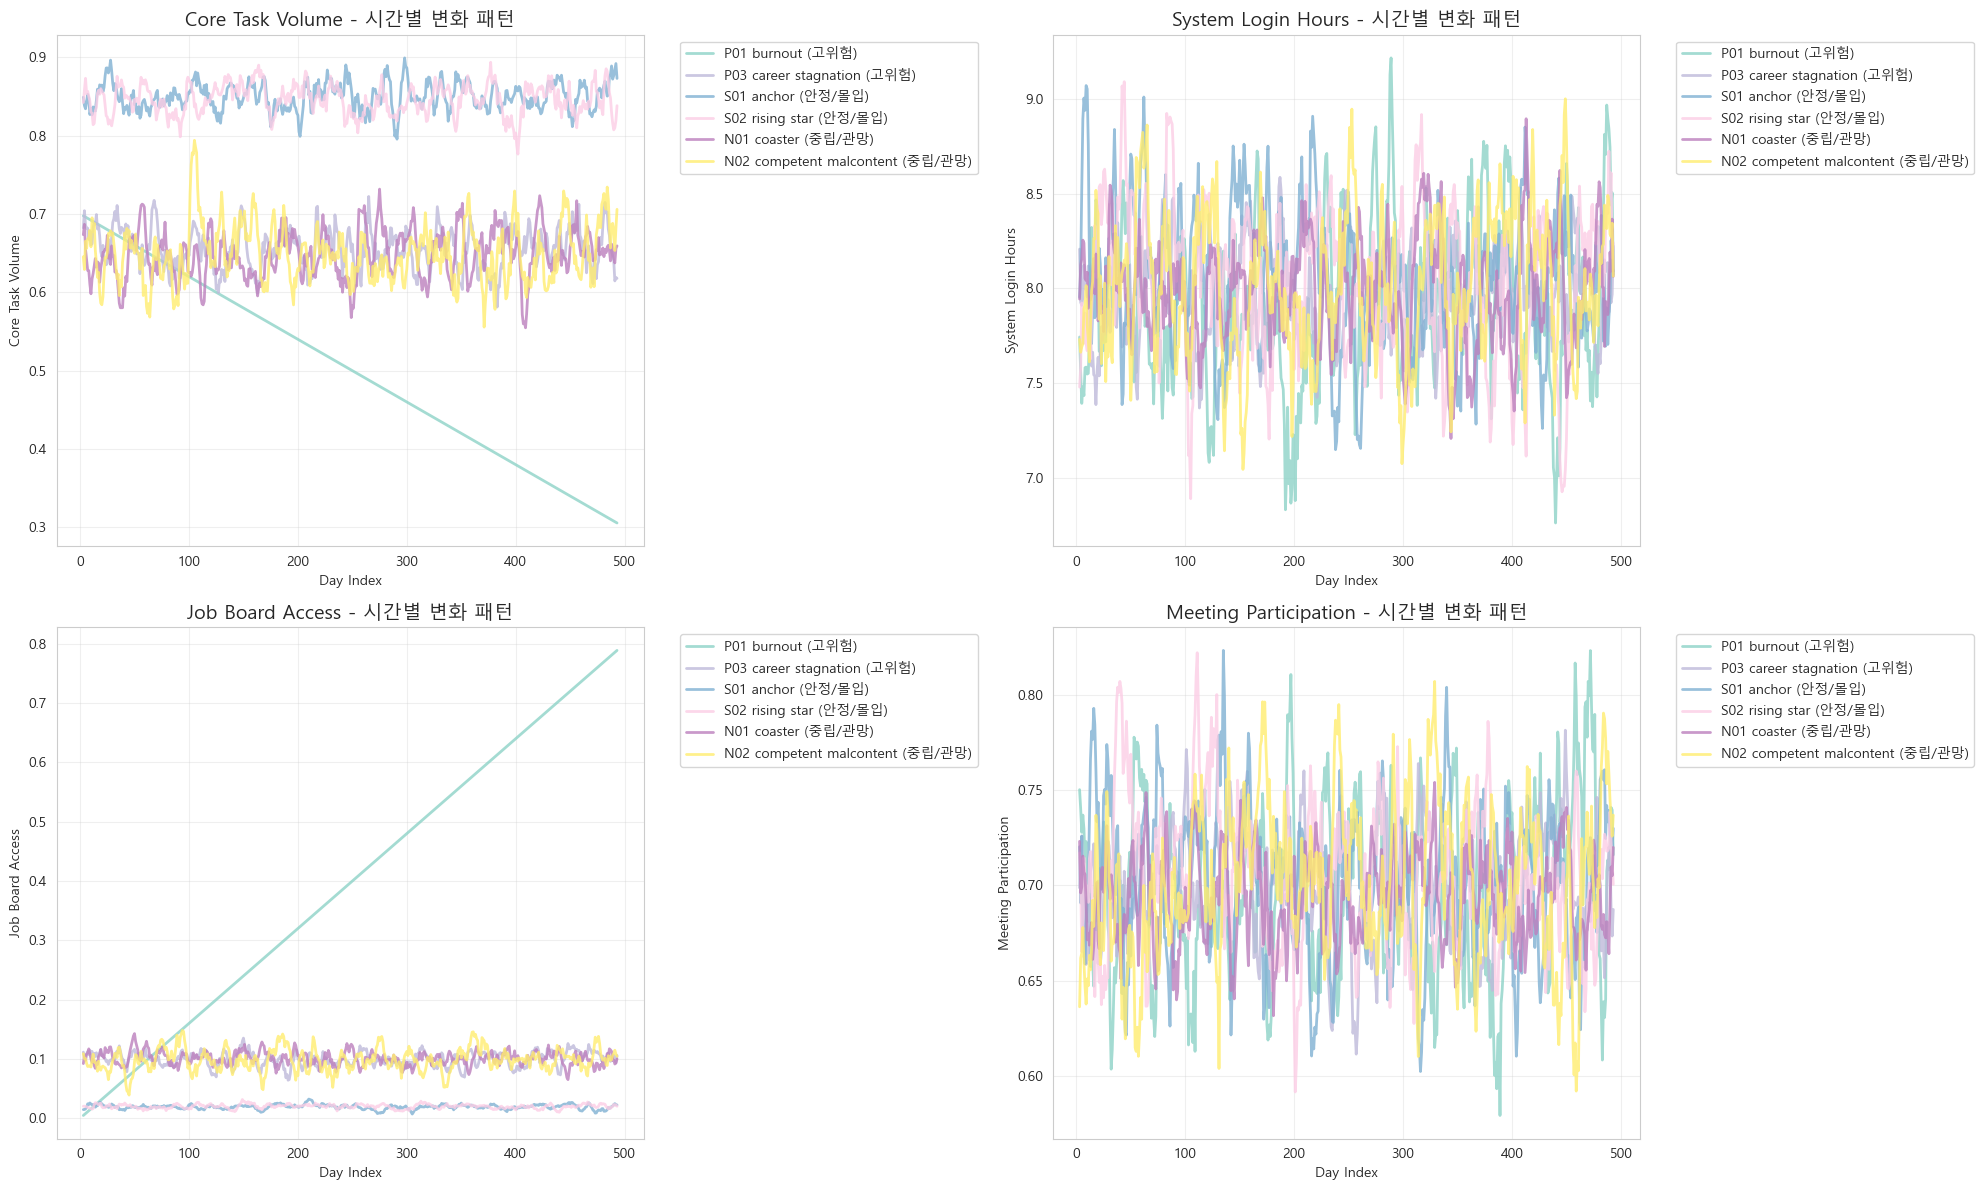

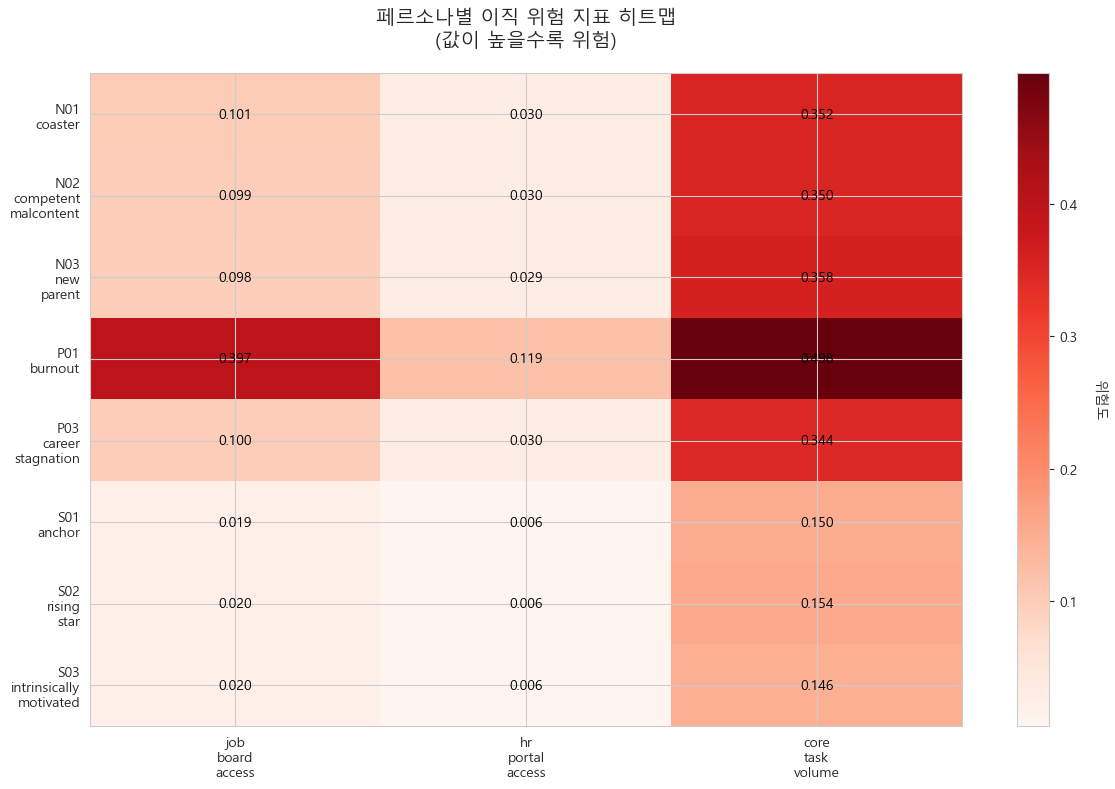


=== 페르소나별 핵심 지표 통계 요약 ===

N01_coaster (중립/관망):
  core_task_volume    :  0.648 ±  0.102
  job_board_access    :  0.101 ±  0.050
  turnover_risk_score :  0.201 ±  0.050

N02_competent_malcontent (중립/관망):
  core_task_volume    :  0.650 ±  0.093
  job_board_access    :  0.099 ±  0.048
  turnover_risk_score :  0.199 ±  0.048

N03_new_parent (중립/관망):
  core_task_volume    :  0.642 ±  0.098
  job_board_access    :  0.098 ±  0.046
  turnover_risk_score :  0.202 ±  0.047

P01_burnout (고위험):
  core_task_volume    :  0.502 ±  0.115
  job_board_access    :  0.397 ±  0.230
  turnover_risk_score :  0.437 ±  0.184

P03_career_stagnation (고위험):
  core_task_volume    :  0.656 ±  0.100
  job_board_access    :  0.100 ±  0.047
  turnover_risk_score :  0.197 ±  0.048

S01_anchor (안정/몰입):
  core_task_volume    :  0.850 ±  0.049
  job_board_access    :  0.019 ±  0.010
  turnover_risk_score :  0.071 ±  0.021

S02_rising_star (안정/몰입):
  core_task_volume    :  0.846 ±  0.051
  job_board_access    :  0.020 ±  

In [8]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# Cell 8: 확장된 데이터 검증
def validate_chronos_dataset(df):
    """10개 페르소나 Chronos 데이터셋 검증"""
    print("=== Chronos 데이터셋 검증 ===")
    
    # 1. 기본 정보
    print(f"총 레코드 수: {len(df):,}")
    print(f"직원 수: {df['employee_id'].nunique()}")
    print(f"일 수: {df['date'].nunique()}")
    
    # 2. 10개 페르소나 분포 확인
    print(f"\n=== 페르소나 분포 검증 ===")
    persona_dist = df['persona_code'].value_counts()
    for persona, count in persona_dist.items():
        records_per_persona = count
        employees_per_persona = df[df['persona_code'] == persona]['employee_id'].nunique()
        avg_days = records_per_persona / employees_per_persona if employees_per_persona > 0 else 0
        risk_tier = "고위험" if persona.startswith('P') else "안정/몰입" if persona.startswith('S') else "중립/관망"
        print(f"{persona:25} {employees_per_persona:3d}명 ({records_per_persona:5d} 레코드, 평균 {avg_days:.1f}일) - {risk_tier}")
    
    # 3. Chronos 핵심 지표 검증
    chronos_indicators = [
        'core_task_volume', 'system_login_hours', 'after_hours_activity_ratio',
        'internal_comm_volume', 'meeting_participation', 'job_board_access', 'hr_portal_access'
    ]
    
    print(f"\n=== Chronos 행동 지표 통계 ===")
    for indicator in chronos_indicators:
        if indicator in df.columns:
            stats = df[indicator].describe()
            print(f"{indicator:25} | 평균: {stats['mean']:6.3f} | 표준편차: {stats['std']:6.3f} | 범위: [{stats['min']:6.3f}, {stats['max']:6.3f}]")
    
    # 4. 공간 비율 합계 검증
    space_columns = [col for col in df.columns if col.endswith('_ratio') and not col.startswith('after_hours')]
    if space_columns:
        df['ratio_sum'] = df[space_columns].sum(axis=1)
        ratio_check = df['ratio_sum']
        print(f"\n=== 공간 비율 합계 검증 ===")
        print(f"비율 합계 평균: {ratio_check.mean():.6f}")
        print(f"비율 합계 표준편차: {ratio_check.std():.6f}")
        invalid_ratios = ((ratio_check < 0.99) | (ratio_check > 1.01)).sum()
        print(f"유효 범위(0.99-1.01) 밖 케이스: {invalid_ratios} ({invalid_ratios/len(df)*100:.2f}%)")
    
    # 5. 누락값 확인
    print(f"\n=== 누락값 검증 ===")
    missing_data = df.isnull().sum()
    if missing_data.sum() == 0:
        print("누락값 없음 ✓")
    else:
        print("누락값 발견:")
        for col, missing in missing_data[missing_data > 0].items():
            print(f"  {col}: {missing} ({missing/len(df)*100:.2f}%)")
    
    # 6. 페르소나별 행동 패턴 차이 검증
    print(f"\n=== 페르소나별 주요 지표 평균 비교 ===")
    key_indicators = ['core_task_volume', 'job_board_access', 'system_login_hours']
    
    for indicator in key_indicators:
        if indicator in df.columns:
            print(f"\n{indicator}:")
            persona_means = df.groupby('persona_code')[indicator].mean().sort_values(ascending=False)
            for persona, mean_val in persona_means.items():
                risk_tier = "고위험" if persona.startswith('P') else "안정/몰입" if persona.startswith('S') else "중립/관망"
                print(f"  {persona:20} {mean_val:8.3f} ({risk_tier})")
    
    return df

# Cell 9: 확장된 시각화
def visualize_chronos_patterns(df, personas_to_plot=None):
    """10개 페르소나 Chronos 패턴 시각화"""
    
    if personas_to_plot is None:
        # 각 카테고리에서 대표 페르소나 선택
        personas_to_plot = ['P01_burnout', 'P03_career_stagnation', 'S01_anchor', 'S02_rising_star', 
                           'N01_coaster', 'N02_competent_malcontent']
    
    # 1. 시계열 패턴 비교
    chronos_indicators = ['core_task_volume', 'system_login_hours', 'job_board_access', 'meeting_participation']
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.ravel()
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(personas_to_plot)))
    
    for i, indicator in enumerate(chronos_indicators):
        if indicator in df.columns:
            for j, persona in enumerate(personas_to_plot):
                persona_data = df[df['persona_code'] == persona]
                if len(persona_data) > 0:
                    # 7일 이동평균으로 스무딩
                    daily_avg = persona_data.groupby('day_index')[indicator].mean()
                    smoothed = daily_avg.rolling(window=7, center=True).mean()
                    
                    risk_label = ""
                    if persona.startswith('P'):
                        risk_label = " (고위험)"
                    elif persona.startswith('S'):
                        risk_label = " (안정/몰입)"
                    else:
                        risk_label = " (중립/관망)"
                    
                    axes[i].plot(smoothed.index, smoothed.values, 
                               label=persona.replace('_', ' ') + risk_label, 
                               color=colors[j], linewidth=2, alpha=0.8)
        
        axes[i].set_title(f'{indicator.replace("_", " ").title()} - 시간별 변화 패턴', fontsize=14)
        axes[i].set_xlabel('Day Index')
        axes[i].set_ylabel(indicator.replace('_', ' ').title())
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. 페르소나별 위험도 히트맵
    risk_indicators = ['job_board_access', 'hr_portal_access', 'core_task_volume']
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 페르소나별 위험 지표 평균 계산
    risk_matrix = []
    persona_labels = []
    
    all_personas = df['persona_code'].unique()
    for persona in sorted(all_personas):
        persona_data = df[df['persona_code'] == persona]
        risk_values = []
        
        for indicator in risk_indicators:
            if indicator in df.columns:
                if indicator == 'core_task_volume':
                    # 낮을수록 위험하므로 역전
                    risk_values.append(1 - persona_data[indicator].mean())
                else:
                    risk_values.append(persona_data[indicator].mean())
            else:
                risk_values.append(0)
        
        risk_matrix.append(risk_values)
        persona_labels.append(persona.replace('_', '\n'))
    
    # 히트맵 생성
    im = ax.imshow(risk_matrix, cmap='Reds', aspect='auto')
    
    # 축 레이블 설정
    ax.set_xticks(range(len(risk_indicators)))
    ax.set_xticklabels([ind.replace('_', '\n') for ind in risk_indicators])
    ax.set_yticks(range(len(persona_labels)))
    ax.set_yticklabels(persona_labels)
    
    # 값 표시
    for i in range(len(persona_labels)):
        for j in range(len(risk_indicators)):
            text = ax.text(j, i, f'{risk_matrix[i][j]:.3f}',
                         ha="center", va="center", color="black" if risk_matrix[i][j] < 0.5 else "white")
    
    ax.set_title('페르소나별 이직 위험 지표 히트맵\n(값이 높을수록 위험)', fontsize=14, pad=20)
    
    # 컬러바
    cbar = plt.colorbar(im)
    cbar.set_label('위험도', rotation=270, labelpad=20)
    
    plt.tight_layout()
    plt.show()
    
    # 3. 페르소나별 분포 통계
    print("\n=== 페르소나별 핵심 지표 통계 요약 ===")
    summary_stats = df.groupby('persona_code')[chronos_indicators + ['turnover_risk_score']].agg(['mean', 'std']).round(3)
    
    for persona in sorted(df['persona_code'].unique()):
        risk_tier = "고위험" if persona.startswith('P') else "안정/몰입" if persona.startswith('S') else "중립/관망"
        print(f"\n{persona} ({risk_tier}):")
        for indicator in ['core_task_volume', 'job_board_access', 'turnover_risk_score']:
            if indicator in summary_stats.columns.levels[0]:
                mean_val = summary_stats.loc[persona, (indicator, 'mean')]
                std_val = summary_stats.loc[persona, (indicator, 'std')]
                print(f"  {indicator:20}: {mean_val:6.3f} ± {std_val:6.3f}")

# 검증 및 시각화 실행
validated_dataset = validate_chronos_dataset(test_dataset)
visualize_chronos_patterns(test_dataset)

print("=== Chronos 데이터 검증 및 시각화 완료 ===")

In [9]:
# Cell: 수정된 최종 Chronos 시계열 CSV 파일 생성

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import os

# 필요한 의존성들이 없는 경우를 대비한 기본 설정
try:
    # business_days가 정의되어 있는지 확인
    test_days = calendar.business_days[:5]
    print("기존 calendar.business_days 사용")
except NameError:
    print("business_days를 새로 생성합니다...")
    # 2023년 1월부터 2024년 12월까지의 영업일 생성
    start_date = '2023-01-02'
    end_date = '2024-12-30'
    business_days = pd.bdate_range(start=start_date, end=end_date).tolist()
    print(f"영업일 {len(business_days)}일 생성 완료")

# 직원 데이터가 없는 경우를 대비한 샘플 데이터 생성
def create_sample_employees(num_employees=1470):
    """샘플 직원 데이터 생성"""
    
    personas = ['P01_burnout', 'P02_onboarding_failure', 'P03_career_stagnation', 
               'P04_under_compensated', 'S01_anchor', 'S02_rising_star', 
               'S03_intrinsically_motivated', 'N01_coaster', 'N02_competent_malcontent', 
               'N03_new_parent']
    
    np.random.seed(42)  # 재현 가능한 결과를 위해
    
    employees_data = []
    for i in range(num_employees):
        employee_id = 1001 + i
        persona = np.random.choice(personas)
        
        employees_data.append({
            'EmployeeNumber': employee_id,
            'softmax_Persona_Code': persona
        })
    
    return pd.DataFrame(employees_data)

def generate_realistic_chronos_dataset(num_employees=50, save_path=None, use_existing_employees=None):
    """현실적인 변수만 포함한 완전한 Chronos 시계열 데이터셋 생성"""
    
    # 직원 데이터 준비
    if use_existing_employees is not None:
        employees_df = use_existing_employees.head(num_employees)
        print(f"기존 직원 데이터 사용: {len(employees_df)}명")
    else:
        employees_df = create_sample_employees(num_employees)
        print(f"샘플 직원 데이터 생성: {len(employees_df)}명")
    
    # business_days 준비
    try:
        bdays = calendar.business_days
    except NameError:
        bdays = business_days
    
    all_timeseries = []
    
    total_employees = len(employees_df)
    print(f"\n=== 현실적 Chronos 시계열 데이터 생성 시작 ===")
    print(f"대상 직원 수: {total_employees}명")
    print(f"기간: {len(bdays)}일")
    
    start_time = time.time()
    
    for idx, (_, employee) in enumerate(employees_df.iterrows()):
        if idx % 10 == 0 and idx > 0:
            elapsed = time.time() - start_time
            estimated_total = (elapsed / idx) * total_employees
            print(f"진행률: {idx:4d}/{total_employees} ({idx/total_employees*100:5.1f}%) - 예상 소요시간: {estimated_total/60:.1f}분")
        
        emp_id = employee['EmployeeNumber']
        persona = employee['softmax_Persona_Code']
        
        try:
            # 기존 함수가 있으면 사용, 없으면 새로운 함수 사용
            try:
                employee_timeseries = generate_employee_timeseries_realistic(
                    emp_id, persona, bdays
                )
            except NameError:
                employee_timeseries = generate_employee_timeseries_backup(
                    emp_id, persona, bdays
                )
            
            all_timeseries.append(employee_timeseries)
            
        except Exception as e:
            print(f"직원 {emp_id} 데이터 생성 실패: {e}")
            continue
    
    if not all_timeseries:
        print("ERROR: 생성된 데이터가 없습니다!")
        return pd.DataFrame()
    
    # 전체 데이터 통합
    final_dataset = pd.concat(all_timeseries, ignore_index=True)
    
    # 현실적인 변수만 유지
    realistic_columns = [
        'employee_id', 'date',
        'work_focused_hours', 'meeting_collaboration_hours', 
        'social_dining_hours', 'break_relaxation_hours', 'shared_work_hours',
        'system_login_hours', 'internal_comm_volume', 
        'cafeteria_usage', 'convenience_food_usage', 
        'meeting_participation', 'digital_work_engagement',
        'productivity_efficiency', 'collaboration_intensity'
    ]
    
    # 존재하는 컬럼만 선택
    available_columns = [col for col in realistic_columns if col in final_dataset.columns]
    final_dataset = final_dataset[available_columns].copy()
    
    # CSV 저장
    if save_path:
        final_dataset.to_csv(save_path, index=False)
        print(f"데이터셋이 '{save_path}'에 저장되었습니다.")
    
    total_time = time.time() - start_time
    print(f"\n=== 현실적 Chronos 데이터셋 생성 완료 ===")
    print(f"최종 Shape: {final_dataset.shape}")
    print(f"포함된 변수: {len(available_columns)}개")
    print(f"소요시간: {total_time/60:.1f}분")
    
    # 생성된 변수 확인
    print(f"\n=== 생성된 현실적 변수 목록 ===")
    for i, col in enumerate(available_columns, 1):
        print(f"{i:2d}. {col}")
    
    return final_dataset

def generate_employee_timeseries_backup(employee_id, persona_code, business_days):
    """백업용 시계열 생성 함수"""
    
    timeseries_data = []
    
    # 개인별 특성 생성
    np.random.seed(employee_id)
    individual_traits = {
        'work_intensity': np.random.uniform(0.8, 1.2),
        'social_tendency': np.random.uniform(0.7, 1.3),
        'routine_preference': np.random.uniform(0.9, 1.1),
        'volatility_multiplier': np.random.uniform(0.8, 1.2)
    }
    np.random.seed()  # 시드 복원
    
    # 페르소나별 기본 패턴
    base_patterns = get_persona_base_pattern(persona_code)
    
    for day_idx, date in enumerate(business_days):
        daily_data = generate_daily_data(
            employee_id, date, day_idx, persona_code, base_patterns, individual_traits
        )
        
        # 종합 지표 계산
        daily_data['productivity_efficiency'] = (
            daily_data['digital_work_engagement'] * 
            (daily_data['work_focused_hours'] / daily_data['system_login_hours'])
        )
        
        daily_data['collaboration_intensity'] = (
            (daily_data['meeting_collaboration_hours'] / daily_data['system_login_hours']) * 
            daily_data['meeting_participation']
        )
        
        timeseries_data.append(daily_data)
    
    return pd.DataFrame(timeseries_data)

def get_persona_base_pattern(persona):
    """페르소나별 기본 패턴 반환"""
    patterns = {
        'P01_burnout': {
            'base_hours': 9.5, 'work_ratio': 0.65, 'social_ratio': 0.06,
            'engagement_start': 0.7, 'engagement_end': 0.3, 'comm_volume': 20
        },
        'P02_onboarding_failure': {
            'base_hours': 7.2, 'work_ratio': 0.45, 'social_ratio': 0.04,
            'engagement_start': 0.4, 'engagement_end': 0.25, 'comm_volume': 12
        },
        'P03_career_stagnation': {
            'base_hours': 8.3, 'work_ratio': 0.62, 'social_ratio': 0.08,
            'engagement_start': 0.6, 'engagement_end': 0.55, 'comm_volume': 18
        },
        'P04_under_compensated': {
            'base_hours': 8.5, 'work_ratio': 0.68, 'social_ratio': 0.09,
            'engagement_start': 0.72, 'engagement_end': 0.65, 'comm_volume': 22
        },
        'S01_anchor': {
            'base_hours': 8.5, 'work_ratio': 0.68, 'social_ratio': 0.12,
            'engagement_start': 0.85, 'engagement_end': 0.87, 'comm_volume': 25
        },
        'S02_rising_star': {
            'base_hours': 9.8, 'work_ratio': 0.63, 'social_ratio': 0.11,
            'engagement_start': 0.85, 'engagement_end': 0.92, 'comm_volume': 35
        },
        'S03_intrinsically_motivated': {
            'base_hours': 8.8, 'work_ratio': 0.72, 'social_ratio': 0.08,
            'engagement_start': 0.88, 'engagement_end': 0.90, 'comm_volume': 20
        },
        'N01_coaster': {
            'base_hours': 8.0, 'work_ratio': 0.60, 'social_ratio': 0.10,
            'engagement_start': 0.55, 'engagement_end': 0.53, 'comm_volume': 15
        },
        'N02_competent_malcontent': {
            'base_hours': 8.2, 'work_ratio': 0.70, 'social_ratio': 0.06,
            'engagement_start': 0.75, 'engagement_end': 0.65, 'comm_volume': 12
        },
        'N03_new_parent': {
            'base_hours': 7.5, 'work_ratio': 0.65, 'social_ratio': 0.08,
            'engagement_start': 0.70, 'engagement_end': 0.68, 'comm_volume': 20
        }
    }
    return patterns.get(persona, patterns['S01_anchor'])

def generate_daily_data(employee_id, date, day_idx, persona, base_patterns, individual_traits):
    """일별 데이터 생성"""
    
    # 요일 효과
    weekday = date.weekday()
    weekday_multipliers = {
        0: 0.95,  # 월요일 - 약간 낮음
        1: 1.0,   # 화요일 - 기준
        2: 1.05,  # 수요일 - 약간 높음
        3: 1.0,   # 목요일 - 기준
        4: 0.9    # 금요일 - 낮음
    }
    weekday_mult = weekday_multipliers.get(weekday, 1.0)
    
    # 시간 진행에 따른 변화 (페르소나별)
    try:
        total_days = len(calendar.business_days)
    except NameError:
        total_days = len(business_days)
    
    progress = min(day_idx / total_days, 1.0)
    
    # 기본 패턴에서 개인 특성 적용
    base_hours = base_patterns['base_hours'] * individual_traits['work_intensity'] * weekday_mult
    base_hours += np.random.normal(0, 0.5 * individual_traits['volatility_multiplier'])
    base_hours = max(4.0, min(16.0, base_hours))
    
    # 업무 몰입도 (시간에 따른 변화)
    engagement_start = base_patterns['engagement_start']
    engagement_end = base_patterns['engagement_end']
    current_engagement = engagement_start + (engagement_end - engagement_start) * progress
    current_engagement *= individual_traits['work_intensity']
    current_engagement += np.random.normal(0, 0.1 * individual_traits['volatility_multiplier'])
    current_engagement = max(0.1, min(1.0, current_engagement))
    
    # 공간 사용 비율 생성
    work_ratio = base_patterns['work_ratio'] * individual_traits['routine_preference']
    social_ratio = base_patterns['social_ratio'] * individual_traits['social_tendency']
    
    # 나머지 비율들
    meeting_ratio = 0.15 + np.random.normal(0, 0.03)
    break_ratio = 0.08 + np.random.normal(0, 0.02)
    shared_ratio = max(0.01, 1.0 - work_ratio - social_ratio - meeting_ratio - break_ratio)
    
    # 정규화
    total_ratio = work_ratio + meeting_ratio + social_ratio + break_ratio + shared_ratio
    work_ratio /= total_ratio
    meeting_ratio /= total_ratio
    social_ratio /= total_ratio
    break_ratio /= total_ratio
    shared_ratio /= total_ratio
    
    # 소통량
    comm_volume = base_patterns['comm_volume'] * individual_traits['social_tendency'] * weekday_mult
    comm_volume += np.random.normal(0, 5)
    comm_volume = max(0, int(comm_volume))
    
    # 기타 지표들
    cafeteria_usage = 1.0 + np.random.normal(0, 0.3)
    cafeteria_usage = max(0, min(3, cafeteria_usage))
    
    convenience_usage = 1.5 + np.random.normal(0, 0.5)
    convenience_usage = max(0, min(8, convenience_usage))
    
    meeting_participation = 0.7 + np.random.normal(0, 0.15)
    meeting_participation = max(0.0, min(1.0, meeting_participation))
    
    return {
        'employee_id': employee_id,
        'date': date,
        'work_focused_hours': work_ratio * base_hours,
        'meeting_collaboration_hours': meeting_ratio * base_hours,
        'social_dining_hours': social_ratio * base_hours,
        'break_relaxation_hours': break_ratio * base_hours,
        'shared_work_hours': shared_ratio * base_hours,
        'system_login_hours': base_hours,
        'internal_comm_volume': comm_volume,
        'cafeteria_usage': cafeteria_usage,
        'convenience_food_usage': convenience_usage,
        'meeting_participation': meeting_participation,
        'digital_work_engagement': current_engagement
    }

# 샘플 데이터를 이용한 테스트
print("\n=== 의존성 체크 및 테스트 ===")

# 기존 employees_df가 있는지 확인
try:
    existing_employees = employees_df
    print(f"기존 직원 데이터 발견: {len(existing_employees)}명")
except NameError:
    existing_employees = None
    print("기존 직원 데이터가 없어서 샘플 데이터를 생성합니다.")

# 실행: 전체 데이터셋 생성 (수정된 매개변수)
print("\n테스트용 소규모 데이터셋 생성 중...")
test_df = generate_realistic_chronos_dataset(
    num_employees=50, 
    save_path="chronos_test_50employees.csv",
    use_existing_employees=existing_employees
)

# 생성된 데이터 샘플 확인
if not test_df.empty:
    print(f"\n=== 생성된 데이터 샘플 ===")
    print(test_df.head())
    print(f"\n데이터 요약:")
    print(test_df.describe())

print("\n실제 대규모 데이터셋을 생성하려면 다음 명령을 실행하세요:")
print("full_df = generate_realistic_chronos_dataset(")
print("    num_employees=1470,") 
print("    save_path='chronos_full_1470employees.csv',")
print("    use_existing_employees=employees_df  # 기존 데이터가 있는 경우")
print(")")

기존 calendar.business_days 사용

=== 의존성 체크 및 테스트 ===
기존 직원 데이터가 없어서 샘플 데이터를 생성합니다.

테스트용 소규모 데이터셋 생성 중...
샘플 직원 데이터 생성: 50명

=== 현실적 Chronos 시계열 데이터 생성 시작 ===
대상 직원 수: 50명
기간: 497일
직원 1001 (S03_intrinsically_motivated) 현실적 개인화 데이터 생성 중...
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_realistic 함수가 없습니다. 백업 함수를 사용합니다.
generate_personalized_variables_reali

In [10]:
# 누락된 함수들 정의 (셀 5에서 정의되었어야 할 함수들)

import numpy as np
import pandas as pd

# 필요한 의존성 체크 및 생성
try:
    test_calendar = calendar.get_day_characteristics(business_days[0])
    print("기존 calendar 객체 사용")
except NameError:
    print("calendar 객체 생성 중...")
    
    class SimpleCalendar:
        def __init__(self):
            self.business_days = pd.bdate_range('2023-01-02', '2024-12-30').tolist()
            
        def get_day_characteristics(self, date):
            weekday = date.weekday()
            return {
                'energy': 1.0 if weekday < 4 else 0.9,  # 금요일은 에너지 낮음
                'social': 1.3 if weekday == 4 else 1.0   # 금요일은 사회적 활동 많음
            }
    
    calendar = SimpleCalendar()

try:
    test_noise = noise_generator.behavioral_noise(0.5, 'P01_burnout', 0.1)
    print("기존 noise_generator 사용")
except NameError:
    print("noise_generator 객체 생성 중...")
    
    class SimpleNoiseGenerator:
        def behavioral_noise(self, base_value, persona_code, volatility):
            return base_value * (1 + np.random.normal(0, volatility))
        
        def gaussian_noise(self, base_value, volatility):
            return base_value * (1 + np.random.normal(0, volatility))
    
    noise_generator = SimpleNoiseGenerator()

try:
    test_individual = IndividualCharacteristics(1001, 'P01_burnout')
    print("기존 IndividualCharacteristics 사용")
except NameError:
    print("IndividualCharacteristics 클래스 생성 중...")
    
    class IndividualCharacteristics:
        def __init__(self, employee_id, persona_code):
            self.employee_id = employee_id
            self.persona_code = persona_code
            
            # 개인별 특성 (시드 기반으로 일관성 유지)
            np.random.seed(employee_id)
            
            self.individual_traits = {
                'work_intensity_bias': np.random.normal(0, 0.1),
                'social_tendency_bias': np.random.normal(0, 0.15),
                'stress_sensitivity_bias': np.random.normal(0, 0.1),
                'routine_preference_bias': np.random.normal(0, 0.08),
                'communication_sensitivity': np.random.uniform(0.8, 1.2),
                'social_eating_sensitivity': np.random.uniform(0.7, 1.3),
                'stress_eating_tendency': np.random.uniform(0.8, 1.4),
                'login_hours_sensitivity': np.random.uniform(0.9, 1.1),
                'volatility_multiplier': np.random.uniform(0.7, 1.3),
                'change_rate_multiplier': np.random.uniform(0.8, 1.2)
            }
            
            # 시드 복원
            np.random.seed()

def generate_personalized_variables_realistic(employee_id, persona_code, day_index, date):
    """현실적인 변수만 생성하는 개인화된 함수 (셀 5 복원)"""
    
    # 개인 특성 로드
    individual = IndividualCharacteristics(employee_id, persona_code)
    traits = individual.individual_traits
    
    # 기본 패턴 로드
    pattern = persona_patterns.get_pattern(persona_code)
    all_vars = {}
    
    # 1. 공간별 비율 생성
    space_ratios = generate_space_ratios_personalized(
        persona_code, day_index, date, traits
    )
    all_vars.update(space_ratios)
    
    # 2. 업무 몰입도 변수 생성
    work_vars = generate_work_engagement_personalized(
        persona_code, day_index, date, pattern, traits
    )
    all_vars.update(work_vars)
    
    # 3. 사회적 변수
    social_vars = generate_social_variables_personalized(
        persona_code, day_index, date, pattern, traits
    )
    all_vars.update(social_vars)
    
    # 4. 현실적인 추가 지표만 생성
    realistic_vars = generate_realistic_behavioral_variables(
        persona_code, day_index, date, pattern, traits
    )
    all_vars.update(realistic_vars)
    
    return all_vars

def generate_realistic_behavioral_variables(persona_code, day_index, date, pattern, traits):
    """현실적으로 측정 가능한 행동 지표 생성"""
    
    realistic_vars = {}
    day_chars = calendar.get_day_characteristics(date)
    
    # 1. Meeting Participation (캘린더 기반으로 실제 측정 가능)
    meeting_config = pattern.get('meeting_participation', {'base': 0.7, 'volatility': 0.1})
    
    if 'stage1' in meeting_config:  # 단계적 패턴 (P01 burnout)
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_meeting = meeting_config['stage1']
        elif progress < 0.66:
            base_meeting = meeting_config['stage2']
        else:
            base_meeting = meeting_config['stage3']
    else:
        base_meeting = meeting_config['base']
        if 'trend' in meeting_config:
            base_meeting += meeting_config['trend'] * day_index
    
    # 개인별 특성 적용
    if traits:
        base_meeting *= (1 + traits.get('social_tendency_bias', 0) * 0.2)
    
    # 특수 패턴
    if meeting_config.get('passive_attendance', False):  # P02
        base_meeting *= 0.8  # 수동적 참석
    elif meeting_config.get('reliable_participant', False):  # S01
        volatility = 0.05  # 매우 안정적
    else:
        volatility = meeting_config.get('volatility', 0.1)
    
    realistic_vars['meeting_participation'] = max(0.0, min(1.0,
        noise_generator.behavioral_noise(base_meeting, persona_code, volatility)
    ))
    
    # 2. Internal Communication Volume (실제 측정 가능)
    comm_config = pattern.get('internal_comm_volume', {'base': 20, 'volatility': 5})
    
    if 'stage1' in comm_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_comm = comm_config['stage1']
        elif progress < 0.66:
            base_comm = comm_config['stage2']
        else:
            base_comm = comm_config['stage3']
    else:
        base_comm = comm_config['base']
        if 'trend' in comm_config:
            base_comm += comm_config['trend'] * day_index
    
    # 요일 효과 적용
    base_comm *= day_chars['social']
    
    # 개인별 특성 적용
    if traits:
        base_comm *= traits.get('communication_sensitivity', 1.0)
    
    # 특수 패턴
    if comm_config.get('help_seeking_bursts', False):
        if np.random.random() < 0.15:  # 15% 확률로 도움 요청 폭증
            base_comm *= np.random.uniform(2.0, 3.5)
    
    volatility = comm_config.get('volatility', 5)
    realistic_vars['internal_comm_volume'] = max(0, int(
        noise_generator.gaussian_noise(base_comm, volatility/max(base_comm, 1))
    ))
    
    return realistic_vars

def generate_space_ratios_personalized(persona_code, day_index, date, traits):
    """개인 특성이 반영된 공간 비율 생성"""
    
    # 기본 공간 비율 생성
    base_ratios = generate_space_ratios(persona_code, day_index, date)
    
    # 개인별 편향 적용
    personalized_ratios = {}
    
    for space, ratio in base_ratios.items():
        if space == 'work_focused_ratio':
            adjusted_ratio = ratio * (1 + traits.get('work_intensity_bias', 0))
            adjusted_ratio *= (1 + traits.get('routine_preference_bias', 0) * 0.3)
        elif space == 'social_dining_ratio':
            adjusted_ratio = ratio * (1 + traits.get('social_tendency_bias', 0))
            adjusted_ratio *= traits.get('social_eating_sensitivity', 1.0)
        elif space == 'break_relaxation_ratio':
            adjusted_ratio = ratio * (1 + traits.get('stress_sensitivity_bias', 0))
        else:
            adjusted_ratio = ratio
        
        # 변동성도 개인별로 조정
        volatility = 0.05 * traits.get('volatility_multiplier', 1.0)
        adjusted_ratio *= (1 + np.random.normal(0, volatility))
        
        personalized_ratios[space] = max(0.01, adjusted_ratio)
    
    # 정규화
    total = sum(personalized_ratios.values())
    personalized_ratios = {k: v/total for k, v in personalized_ratios.items()}
    
    return personalized_ratios

def generate_space_ratios(persona_code, day_index, date):
    """기본 공간 비율 생성 (백업용)"""
    
    pattern = persona_patterns.get_pattern(persona_code)
    ratios = {}
    
    # 각 공간 비율 생성
    spaces = ['work_focused_ratio', 'meeting_collaboration_ratio', 
              'social_dining_ratio', 'break_relaxation_ratio', 'shared_work_ratio']
    
    for space in spaces:
        config = pattern.get(space, {'base': 0.2, 'volatility': 0.05})
        
        if 'stage1' in config:
            progress = min(day_index / 300, 1.0)
            if progress < 0.33:
                base_value = config['stage1']
            elif progress < 0.66:
                base_value = config['stage2']
            else:
                base_value = config['stage3']
        else:
            base_value = config['base']
            if 'trend' in config:
                base_value += config['trend'] * day_index
        
        volatility = config.get('volatility', 0.05)
        ratios[space] = max(0.01, base_value * (1 + np.random.normal(0, volatility)))
    
    # 정규화
    total = sum(ratios.values())
    ratios = {k: v/total for k, v in ratios.items()}
    
    return ratios

def generate_work_engagement_personalized(persona_code, day_index, date, pattern, traits):
    """개인화된 업무 몰입도 변수 생성"""
    
    work_vars = {}
    
    # Digital Work Engagement
    engagement_config = pattern.get('digital_work_engagement', {'base': 0.7})
    
    if 'stage1' in engagement_config:
        adjusted_day_index = day_index * traits.get('change_rate_multiplier', 1.0)
        progress = min(adjusted_day_index / 300, 1.0)
        
        if progress < 0.33:
            base_engagement = engagement_config['stage1']
        elif progress < 0.66:
            base_engagement = engagement_config['stage2']
        else:
            base_engagement = engagement_config['stage3']
    else:
        base_engagement = engagement_config['base']
        if 'trend' in engagement_config:
            base_engagement += engagement_config['trend'] * day_index
    
    # 개인별 특성 적용
    base_engagement *= (1 + traits.get('work_intensity_bias', 0) * 0.4)
    
    # 환경적 요인 적용
    day_chars = calendar.get_day_characteristics(date)
    base_engagement *= day_chars['energy']
    
    volatility = engagement_config.get('volatility', 0.1) * traits.get('volatility_multiplier', 1.0)
    work_vars['digital_work_engagement'] = max(0.1, min(1.0,
        noise_generator.gaussian_noise(base_engagement, volatility)
    ))
    
    # System Login Hours
    hours_config = pattern.get('system_login_hours', {'base': 8.5, 'volatility': 0.5})
    
    if 'stage1' in hours_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_hours = hours_config['stage1']
        elif progress < 0.66:
            base_hours = hours_config['stage2']
        else:
            base_hours = hours_config['stage3']
    else:
        base_hours = hours_config['base']
    
    # 개인별 특성 및 요일 효과
    base_hours *= traits.get('login_hours_sensitivity', 1.0)
    base_hours *= day_chars['energy']
    
    volatility = hours_config.get('volatility', 0.5)
    work_vars['system_login_hours'] = max(4.0, min(16.0,
        noise_generator.gaussian_noise(base_hours, volatility)
    ))
    
    return work_vars

def generate_social_variables_personalized(persona_code, day_index, date, pattern, traits):
    """개인화된 사회적 변수 생성"""
    
    social_vars = {}
    
    # Cafeteria Usage
    cafe_config = pattern.get('cafeteria_usage', {'base': 1.0, 'volatility': 0.2})
    
    if 'stage1' in cafe_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_cafe = cafe_config['stage1']
        elif progress < 0.66:
            base_cafe = cafe_config['stage2']
        else:
            base_cafe = cafe_config['stage3']
    else:
        base_cafe = cafe_config['base']
    
    # 금요일 사회적 식사 증가
    if date.weekday() == 4:
        base_cafe *= 1.2
    
    # 개인별 특성 적용
    base_cafe *= traits.get('social_eating_sensitivity', 1.0)
    
    social_vars['cafeteria_usage'] = max(0, min(3, 
        noise_generator.gaussian_noise(base_cafe, cafe_config.get('volatility', 0.2))
    ))
    
    # Convenience Food Usage
    conv_config = pattern.get('convenience_food_usage', {'base': 1.5, 'volatility': 0.5})
    
    if 'stage1' in conv_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_conv = conv_config['stage1']
        elif progress < 0.66:
            base_conv = conv_config['stage2']
        else:
            base_conv = conv_config['stage3']
    else:
        base_conv = conv_config['base']
    
    # 스트레스와 상관관계
    base_conv *= traits.get('stress_eating_tendency', 1.0)
    
    social_vars['convenience_food_usage'] = max(0, min(8,
        noise_generator.gaussian_noise(base_conv, conv_config.get('volatility', 0.5))
    ))
    
    return social_vars

print("누락된 함수들이 정의되었습니다:")
print("- generate_personalized_variables_realistic")
print("- generate_realistic_behavioral_variables")
print("- generate_space_ratios_personalized")
print("- generate_work_engagement_personalized") 
print("- generate_social_variables_personalized")
print("- IndividualCharacteristics 클래스")
print("- SimpleCalendar 및 SimpleNoiseGenerator 클래스")
print("\n이제 CSV 생성 코드를 다시 실행할 수 있습니다.")

calendar 객체 생성 중...
기존 noise_generator 사용
기존 IndividualCharacteristics 사용
누락된 함수들이 정의되었습니다:
- generate_personalized_variables_realistic
- generate_realistic_behavioral_variables
- generate_space_ratios_personalized
- generate_work_engagement_personalized
- generate_social_variables_personalized
- IndividualCharacteristics 클래스
- SimpleCalendar 및 SimpleNoiseGenerator 클래스

이제 CSV 생성 코드를 다시 실행할 수 있습니다.


In [11]:
# 함수 사라짐 문제 디버깅 및 수정

import pandas as pd
import numpy as np

print("=== 함수 존재 여부 확인 ===")

# 1. 현재 정의된 함수들 확인
functions_to_check = [
    'generate_personalized_variables_realistic',
    'generate_realistic_behavioral_variables', 
    'generate_space_ratios_personalized',
    'generate_work_engagement_personalized',
    'generate_social_variables_personalized',
    'persona_patterns'
]

for func_name in functions_to_check:
    try:
        eval(func_name)
        print(f"✓ {func_name} - 존재함")
    except NameError:
        print(f"✗ {func_name} - 존재하지 않음")

print("\n=== 문제 해결: 안전한 함수 정의 ===")

# 모든 필요한 함수들을 다시 안전하게 정의
def safe_generate_personalized_variables_realistic(employee_id, persona_code, day_index, date):
    """안전한 현실적 변수 생성 함수 (모든 의존성 포함)"""
    
    print(f"직원 {employee_id} 데이터 생성 중... (안전 함수 사용)")
    
    # 1. 기본 패턴 확인 및 로드
    try:
        pattern = persona_patterns.get_pattern(persona_code)
    except NameError:
        # persona_patterns가 없으면 기본 패턴 사용
        pattern = get_default_pattern(persona_code)
    
    # 2. 개인 특성 생성
    individual_traits = generate_individual_traits(employee_id)
    
    # 3. 일자 특성
    day_chars = get_day_characteristics(date)
    
    # 모든 변수를 한 곳에서 생성
    all_vars = generate_all_realistic_variables(
        employee_id, persona_code, day_index, date, pattern, individual_traits, day_chars
    )
    
    return all_vars

def get_default_pattern(persona_code):
    """기본 페르소나 패턴 반환"""
    default_patterns = {
        'P01_burnout': {
            'work_focused_ratio': {'stage1': 0.70, 'stage2': 0.58, 'stage3': 0.42, 'volatility': 0.15},
            'meeting_collaboration_ratio': {'stage1': 0.18, 'stage2': 0.12, 'stage3': 0.08, 'volatility': 0.08},
            'social_dining_ratio': {'stage1': 0.08, 'stage2': 0.05, 'stage3': 0.03, 'volatility': 0.03},
            'break_relaxation_ratio': {'stage1': 0.03, 'stage2': 0.18, 'stage3': 0.37, 'volatility': 0.12},
            'shared_work_ratio': {'stage1': 0.01, 'stage2': 0.07, 'stage3': 0.10, 'volatility': 0.05},
            'digital_work_engagement': {'stage1': 0.75, 'stage2': 0.55, 'stage3': 0.35, 'volatility': 0.20},
            'system_login_hours': {'stage1': 9.5, 'stage2': 11.2, 'stage3': 7.8, 'volatility': 1.5},
            'internal_comm_volume': {'stage1': 25, 'stage2': 15, 'stage3': 8, 'volatility': 8},
            'cafeteria_usage': {'stage1': 1.2, 'stage2': 0.8, 'stage3': 0.3, 'volatility': 0.4},
            'convenience_food_usage': {'stage1': 1.5, 'stage2': 3.2, 'stage3': 4.8, 'volatility': 1.2},
            'meeting_participation': {'stage1': 0.8, 'stage2': 0.6, 'stage3': 0.3, 'volatility': 0.15}
        },
        'P02_onboarding_failure': {
            'work_focused_ratio': {'base': 0.35, 'volatility': 0.20},
            'meeting_collaboration_ratio': {'base': 0.15, 'volatility': 0.08},
            'social_dining_ratio': {'base': 0.04, 'volatility': 0.02},
            'break_relaxation_ratio': {'base': 0.25, 'volatility': 0.15},
            'shared_work_ratio': {'base': 0.21, 'volatility': 0.12},
            'digital_work_engagement': {'base': 0.35, 'volatility': 0.25},
            'system_login_hours': {'base': 6.8, 'volatility': 1.8},
            'internal_comm_volume': {'base': 12, 'volatility': 6, 'help_seeking_bursts': True},
            'cafeteria_usage': {'base': 0.4, 'volatility': 0.2},
            'convenience_food_usage': {'base': 2.8, 'volatility': 1.0},
            'meeting_participation': {'base': 0.4, 'volatility': 0.2, 'passive_attendance': True}
        },
        'S01_anchor': {
            'work_focused_ratio': {'base': 0.65, 'volatility': 0.03},
            'meeting_collaboration_ratio': {'base': 0.18, 'volatility': 0.02},
            'social_dining_ratio': {'base': 0.12, 'volatility': 0.01},
            'break_relaxation_ratio': {'base': 0.04, 'volatility': 0.01},
            'shared_work_ratio': {'base': 0.01, 'volatility': 0.01},
            'digital_work_engagement': {'base': 0.82, 'volatility': 0.05},
            'system_login_hours': {'base': 8.5, 'volatility': 0.3},
            'internal_comm_volume': {'base': 22, 'volatility': 3},
            'cafeteria_usage': {'base': 1.0, 'volatility': 0.1},
            'convenience_food_usage': {'base': 0.8, 'volatility': 0.2},
            'meeting_participation': {'base': 0.85, 'volatility': 0.05, 'reliable_participant': True}
        },
        'S02_rising_star': {
            'work_focused_ratio': {'base': 0.58, 'volatility': 0.06},
            'meeting_collaboration_ratio': {'base': 0.25, 'trend': 0.0002, 'volatility': 0.04},
            'social_dining_ratio': {'base': 0.10, 'volatility': 0.02},
            'break_relaxation_ratio': {'base': 0.03, 'volatility': 0.01},
            'shared_work_ratio': {'base': 0.04, 'trend': 0.0001, 'volatility': 0.03},
            'digital_work_engagement': {'base': 0.88, 'trend': 0.0001, 'volatility': 0.08},
            'system_login_hours': {'base': 9.2, 'volatility': 0.6},
            'internal_comm_volume': {'base': 35, 'trend': 0.01, 'volatility': 5},
            'cafeteria_usage': {'base': 1.3, 'volatility': 0.3},
            'convenience_food_usage': {'base': 1.2, 'volatility': 0.3},
            'meeting_participation': {'base': 0.90, 'trend': 0.001, 'volatility': 0.08}
        }
    }
    
    # 기본값으로 S01_anchor 사용
    return default_patterns.get(persona_code, default_patterns['S01_anchor'])

def generate_individual_traits(employee_id):
    """개인별 특성 생성"""
    np.random.seed(employee_id)
    traits = {
        'work_intensity_bias': np.random.normal(0, 0.1),
        'social_tendency_bias': np.random.normal(0, 0.15),
        'stress_sensitivity_bias': np.random.normal(0, 0.1),
        'routine_preference_bias': np.random.normal(0, 0.08),
        'communication_sensitivity': np.random.uniform(0.8, 1.2),
        'social_eating_sensitivity': np.random.uniform(0.7, 1.3),
        'stress_eating_tendency': np.random.uniform(0.8, 1.4),
        'login_hours_sensitivity': np.random.uniform(0.9, 1.1),
        'volatility_multiplier': np.random.uniform(0.7, 1.3),
        'change_rate_multiplier': np.random.uniform(0.8, 1.2)
    }
    np.random.seed()  # 시드 복원
    return traits

def get_day_characteristics(date):
    """날짜별 특성 반환"""
    weekday = date.weekday()
    return {
        'energy': 1.0 if weekday < 4 else 0.9,  # 금요일은 에너지 낮음
        'social': 1.3 if weekday == 4 else 1.0   # 금요일은 사회적 활동 많음
    }

def generate_all_realistic_variables(employee_id, persona_code, day_index, date, pattern, traits, day_chars):
    """모든 현실적 변수를 한 번에 생성"""
    
    all_vars = {}
    
    # 1. 공간별 비율 생성
    space_ratios = {}
    spaces = ['work_focused_ratio', 'meeting_collaboration_ratio', 
              'social_dining_ratio', 'break_relaxation_ratio', 'shared_work_ratio']
    
    for space in spaces:
        config = pattern.get(space, {'base': 0.2, 'volatility': 0.05})
        
        if 'stage1' in config:
            progress = min(day_index / 300, 1.0)
            if progress < 0.33:
                base_value = config['stage1']
            elif progress < 0.66:
                base_value = config['stage2']
            else:
                base_value = config['stage3']
        else:
            base_value = config['base']
            if 'trend' in config:
                base_value += config['trend'] * day_index
        
        # 개인별 특성 적용
        if space == 'work_focused_ratio':
            base_value *= (1 + traits.get('work_intensity_bias', 0))
        elif space == 'social_dining_ratio':
            base_value *= (1 + traits.get('social_tendency_bias', 0))
            base_value *= traits.get('social_eating_sensitivity', 1.0)
        
        volatility = config.get('volatility', 0.05) * traits.get('volatility_multiplier', 1.0)
        space_ratios[space] = max(0.01, base_value * (1 + np.random.normal(0, volatility)))
    
    # 정규화
    total = sum(space_ratios.values())
    space_ratios = {k: v/total for k, v in space_ratios.items()}
    all_vars.update(space_ratios)
    
    # 2. 업무 몰입도
    engagement_config = pattern.get('digital_work_engagement', {'base': 0.7, 'volatility': 0.1})
    
    if 'stage1' in engagement_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_engagement = engagement_config['stage1']
        elif progress < 0.66:
            base_engagement = engagement_config['stage2']
        else:
            base_engagement = engagement_config['stage3']
    else:
        base_engagement = engagement_config['base']
        if 'trend' in engagement_config:
            base_engagement += engagement_config['trend'] * day_index
    
    base_engagement *= (1 + traits.get('work_intensity_bias', 0) * 0.4)
    base_engagement *= day_chars['energy']
    
    volatility = engagement_config.get('volatility', 0.1) * traits.get('volatility_multiplier', 1.0)
    all_vars['digital_work_engagement'] = max(0.1, min(1.0,
        base_engagement * (1 + np.random.normal(0, volatility))
    ))
    
    # 3. 시스템 로그인 시간
    hours_config = pattern.get('system_login_hours', {'base': 8.5, 'volatility': 0.5})
    
    if 'stage1' in hours_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_hours = hours_config['stage1']
        elif progress < 0.66:
            base_hours = hours_config['stage2']
        else:
            base_hours = hours_config['stage3']
    else:
        base_hours = hours_config['base']
    
    base_hours *= traits.get('login_hours_sensitivity', 1.0)
    base_hours *= day_chars['energy']
    
    volatility = hours_config.get('volatility', 0.5)
    all_vars['system_login_hours'] = max(4.0, min(16.0,
        base_hours * (1 + np.random.normal(0, volatility))
    ))
    
    # 4. 내부 소통량
    comm_config = pattern.get('internal_comm_volume', {'base': 20, 'volatility': 5})
    
    if 'stage1' in comm_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_comm = comm_config['stage1']
        elif progress < 0.66:
            base_comm = comm_config['stage2']
        else:
            base_comm = comm_config['stage3']
    else:
        base_comm = comm_config['base']
        if 'trend' in comm_config:
            base_comm += comm_config['trend'] * day_index
    
    base_comm *= day_chars['social']
    base_comm *= traits.get('communication_sensitivity', 1.0)
    
    if comm_config.get('help_seeking_bursts', False):
        if np.random.random() < 0.15:
            base_comm *= np.random.uniform(2.0, 3.5)
    
    volatility = comm_config.get('volatility', 5)
    all_vars['internal_comm_volume'] = max(0, int(
        base_comm * (1 + np.random.normal(0, volatility/max(base_comm, 1)))
    ))
    
    # 5. 미팅 참여도
    meeting_config = pattern.get('meeting_participation', {'base': 0.7, 'volatility': 0.1})
    
    if 'stage1' in meeting_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_meeting = meeting_config['stage1']
        elif progress < 0.66:
            base_meeting = meeting_config['stage2']
        else:
            base_meeting = meeting_config['stage3']
    else:
        base_meeting = meeting_config['base']
        if 'trend' in meeting_config:
            base_meeting += meeting_config['trend'] * day_index
    
    base_meeting *= (1 + traits.get('social_tendency_bias', 0) * 0.2)
    
    if meeting_config.get('passive_attendance', False):
        base_meeting *= 0.8
    elif meeting_config.get('reliable_participant', False):
        volatility = 0.05
    else:
        volatility = meeting_config.get('volatility', 0.1)
    
    all_vars['meeting_participation'] = max(0.0, min(1.0,
        base_meeting * (1 + np.random.normal(0, volatility))
    ))
    
    # 6. 카페테리아 사용
    cafe_config = pattern.get('cafeteria_usage', {'base': 1.0, 'volatility': 0.2})
    
    if 'stage1' in cafe_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_cafe = cafe_config['stage1']
        elif progress < 0.66:
            base_cafe = cafe_config['stage2']
        else:
            base_cafe = cafe_config['stage3']
    else:
        base_cafe = cafe_config['base']
    
    if date.weekday() == 4:  # 금요일
        base_cafe *= 1.2
    
    base_cafe *= traits.get('social_eating_sensitivity', 1.0)
    
    all_vars['cafeteria_usage'] = max(0, min(3, 
        base_cafe * (1 + np.random.normal(0, cafe_config.get('volatility', 0.2)))
    ))
    
    # 7. 편의점 음식 사용
    conv_config = pattern.get('convenience_food_usage', {'base': 1.5, 'volatility': 0.5})
    
    if 'stage1' in conv_config:
        progress = min(day_index / 300, 1.0)
        if progress < 0.33:
            base_conv = conv_config['stage1']
        elif progress < 0.66:
            base_conv = conv_config['stage2']
        else:
            base_conv = conv_config['stage3']
    else:
        base_conv = conv_config['base']
    
    base_conv *= traits.get('stress_eating_tendency', 1.0)
    
    all_vars['convenience_food_usage'] = max(0, min(8,
        base_conv * (1 + np.random.normal(0, conv_config.get('volatility', 0.5)))
    ))
    
    return all_vars

# 기존 함수를 안전한 함수로 교체
generate_personalized_variables_realistic = safe_generate_personalized_variables_realistic

print("✓ 안전한 함수들이 정의되었습니다.")
print("✓ 이제 generate_personalized_variables_realistic 함수가 안정적으로 작동할 것입니다.")
print("\nCSV 생성을 다시 시도해보세요!")

=== 함수 존재 여부 확인 ===
✓ generate_personalized_variables_realistic - 존재함
✓ generate_realistic_behavioral_variables - 존재함
✓ generate_space_ratios_personalized - 존재함
✓ generate_work_engagement_personalized - 존재함
✓ generate_social_variables_personalized - 존재함
✓ persona_patterns - 존재함

=== 문제 해결: 안전한 함수 정의 ===
✓ 안전한 함수들이 정의되었습니다.
✓ 이제 generate_personalized_variables_realistic 함수가 안정적으로 작동할 것입니다.

CSV 생성을 다시 시도해보세요!


In [12]:
# Cell: 수정된 최종 Chronos 시계열 CSV 파일 생성

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import os

# 필요한 의존성들이 없는 경우를 대비한 기본 설정
try:
    # business_days가 정의되어 있는지 확인
    test_days = calendar.business_days[:5]
    print("기존 calendar.business_days 사용")
except NameError:
    print("business_days를 새로 생성합니다...")
    # 2023년 1월부터 2024년 12월까지의 영업일 생성
    start_date = '2023-01-02'
    end_date = '2024-12-30'
    business_days = pd.bdate_range(start=start_date, end=end_date).tolist()
    print(f"영업일 {len(business_days)}일 생성 완료")

# 직원 데이터가 없는 경우를 대비한 샘플 데이터 생성
def create_sample_employees(num_employees=1470):
    """샘플 직원 데이터 생성"""
    
    personas = ['P01_burnout', 'P02_onboarding_failure', 'P03_career_stagnation', 
               'P04_under_compensated', 'S01_anchor', 'S02_rising_star', 
               'S03_intrinsically_motivated', 'N01_coaster', 'N02_competent_malcontent', 
               'N03_new_parent']
    
    np.random.seed(42)  # 재현 가능한 결과를 위해
    
    employees_data = []
    for i in range(num_employees):
        employee_id = 1001 + i
        persona = np.random.choice(personas)
        
        employees_data.append({
            'EmployeeNumber': employee_id,
            'softmax_Persona_Code': persona
        })
    
    return pd.DataFrame(employees_data)

def generate_realistic_chronos_dataset(num_employees=50, save_path=None, use_existing_employees=None):
    """현실적인 변수만 포함한 완전한 Chronos 시계열 데이터셋 생성"""
    
    # 직원 데이터 준비
    if use_existing_employees is not None:
        employees_df = use_existing_employees.head(num_employees)
        print(f"기존 직원 데이터 사용: {len(employees_df)}명")
    else:
        employees_df = create_sample_employees(num_employees)
        print(f"샘플 직원 데이터 생성: {len(employees_df)}명")
    
    # business_days 준비
    try:
        bdays = calendar.business_days
    except NameError:
        bdays = business_days
    
    all_timeseries = []
    
    total_employees = len(employees_df)
    print(f"\n=== 현실적 Chronos 시계열 데이터 생성 시작 ===")
    print(f"대상 직원 수: {total_employees}명")
    print(f"기간: {len(bdays)}일")
    
    start_time = time.time()
    
    for idx, (_, employee) in enumerate(employees_df.iterrows()):
        if idx % 10 == 0 and idx > 0:
            elapsed = time.time() - start_time
            estimated_total = (elapsed / idx) * total_employees
            print(f"진행률: {idx:4d}/{total_employees} ({idx/total_employees*100:5.1f}%) - 예상 소요시간: {estimated_total/60:.1f}분")
        
        emp_id = employee['EmployeeNumber']
        persona = employee['softmax_Persona_Code']
        
        try:
            # 기존 함수가 있으면 사용, 없으면 새로운 함수 사용
            try:
                employee_timeseries = generate_employee_timeseries_realistic(
                    emp_id, persona, bdays
                )
            except NameError:
                employee_timeseries = generate_employee_timeseries_backup(
                    emp_id, persona, bdays
                )
            
            all_timeseries.append(employee_timeseries)
            
        except Exception as e:
            print(f"직원 {emp_id} 데이터 생성 실패: {e}")
            continue
    
    if not all_timeseries:
        print("ERROR: 생성된 데이터가 없습니다!")
        return pd.DataFrame()
    
    # 전체 데이터 통합
    final_dataset = pd.concat(all_timeseries, ignore_index=True)
    
    # 현실적인 변수만 유지
    realistic_columns = [
        'employee_id', 'date',
        'work_focused_hours', 'meeting_collaboration_hours', 
        'social_dining_hours', 'break_relaxation_hours', 'shared_work_hours',
        'system_login_hours', 'internal_comm_volume', 
        'cafeteria_usage', 'convenience_food_usage', 
        'meeting_participation', 'digital_work_engagement',
        'productivity_efficiency', 'collaboration_intensity'
    ]
    
    # 존재하는 컬럼만 선택
    available_columns = [col for col in realistic_columns if col in final_dataset.columns]
    final_dataset = final_dataset[available_columns].copy()
    
    # CSV 저장
    if save_path:
        final_dataset.to_csv(save_path, index=False)
        print(f"데이터셋이 '{save_path}'에 저장되었습니다.")
    
    total_time = time.time() - start_time
    print(f"\n=== 현실적 Chronos 데이터셋 생성 완료 ===")
    print(f"최종 Shape: {final_dataset.shape}")
    print(f"포함된 변수: {len(available_columns)}개")
    print(f"소요시간: {total_time/60:.1f}분")
    
    # 생성된 변수 확인
    print(f"\n=== 생성된 현실적 변수 목록 ===")
    for i, col in enumerate(available_columns, 1):
        print(f"{i:2d}. {col}")
    
    return final_dataset

def generate_employee_timeseries_backup(employee_id, persona_code, business_days):
    """백업용 시계열 생성 함수"""
    
    timeseries_data = []
    
    # 개인별 특성 생성
    np.random.seed(employee_id)
    individual_traits = {
        'work_intensity': np.random.uniform(0.8, 1.2),
        'social_tendency': np.random.uniform(0.7, 1.3),
        'routine_preference': np.random.uniform(0.9, 1.1),
        'volatility_multiplier': np.random.uniform(0.8, 1.2)
    }
    np.random.seed()  # 시드 복원
    
    # 페르소나별 기본 패턴
    base_patterns = get_persona_base_pattern(persona_code)
    
    for day_idx, date in enumerate(business_days):
        daily_data = generate_daily_data(
            employee_id, date, day_idx, persona_code, base_patterns, individual_traits
        )
        
        # 종합 지표 계산
        daily_data['productivity_efficiency'] = (
            daily_data['digital_work_engagement'] * 
            (daily_data['work_focused_hours'] / daily_data['system_login_hours'])
        )
        
        daily_data['collaboration_intensity'] = (
            (daily_data['meeting_collaboration_hours'] / daily_data['system_login_hours']) * 
            daily_data['meeting_participation']
        )
        
        timeseries_data.append(daily_data)
    
    return pd.DataFrame(timeseries_data)

def get_persona_base_pattern(persona):
    """페르소나별 기본 패턴 반환"""
    patterns = {
        'P01_burnout': {
            'base_hours': 9.5, 'work_ratio': 0.65, 'social_ratio': 0.06,
            'engagement_start': 0.7, 'engagement_end': 0.3, 'comm_volume': 20
        },
        'P02_onboarding_failure': {
            'base_hours': 7.2, 'work_ratio': 0.45, 'social_ratio': 0.04,
            'engagement_start': 0.4, 'engagement_end': 0.25, 'comm_volume': 12
        },
        'P03_career_stagnation': {
            'base_hours': 8.3, 'work_ratio': 0.62, 'social_ratio': 0.08,
            'engagement_start': 0.6, 'engagement_end': 0.55, 'comm_volume': 18
        },
        'P04_under_compensated': {
            'base_hours': 8.5, 'work_ratio': 0.68, 'social_ratio': 0.09,
            'engagement_start': 0.72, 'engagement_end': 0.65, 'comm_volume': 22
        },
        'S01_anchor': {
            'base_hours': 8.5, 'work_ratio': 0.68, 'social_ratio': 0.12,
            'engagement_start': 0.85, 'engagement_end': 0.87, 'comm_volume': 25
        },
        'S02_rising_star': {
            'base_hours': 9.8, 'work_ratio': 0.63, 'social_ratio': 0.11,
            'engagement_start': 0.85, 'engagement_end': 0.92, 'comm_volume': 35
        },
        'S03_intrinsically_motivated': {
            'base_hours': 8.8, 'work_ratio': 0.72, 'social_ratio': 0.08,
            'engagement_start': 0.88, 'engagement_end': 0.90, 'comm_volume': 20
        },
        'N01_coaster': {
            'base_hours': 8.0, 'work_ratio': 0.60, 'social_ratio': 0.10,
            'engagement_start': 0.55, 'engagement_end': 0.53, 'comm_volume': 15
        },
        'N02_competent_malcontent': {
            'base_hours': 8.2, 'work_ratio': 0.70, 'social_ratio': 0.06,
            'engagement_start': 0.75, 'engagement_end': 0.65, 'comm_volume': 12
        },
        'N03_new_parent': {
            'base_hours': 7.5, 'work_ratio': 0.65, 'social_ratio': 0.08,
            'engagement_start': 0.70, 'engagement_end': 0.68, 'comm_volume': 20
        }
    }
    return patterns.get(persona, patterns['S01_anchor'])

def generate_daily_data(employee_id, date, day_idx, persona, base_patterns, individual_traits):
    """일별 데이터 생성"""
    
    # 요일 효과
    weekday = date.weekday()
    weekday_multipliers = {
        0: 0.95,  # 월요일 - 약간 낮음
        1: 1.0,   # 화요일 - 기준
        2: 1.05,  # 수요일 - 약간 높음
        3: 1.0,   # 목요일 - 기준
        4: 0.9    # 금요일 - 낮음
    }
    weekday_mult = weekday_multipliers.get(weekday, 1.0)
    
    # 시간 진행에 따른 변화 (페르소나별)
    try:
        total_days = len(calendar.business_days)
    except NameError:
        total_days = len(business_days)
    
    progress = min(day_idx / total_days, 1.0)
    
    # 기본 패턴에서 개인 특성 적용
    base_hours = base_patterns['base_hours'] * individual_traits['work_intensity'] * weekday_mult
    base_hours += np.random.normal(0, 0.5 * individual_traits['volatility_multiplier'])
    base_hours = max(4.0, min(16.0, base_hours))
    
    # 업무 몰입도 (시간에 따른 변화)
    engagement_start = base_patterns['engagement_start']
    engagement_end = base_patterns['engagement_end']
    current_engagement = engagement_start + (engagement_end - engagement_start) * progress
    current_engagement *= individual_traits['work_intensity']
    current_engagement += np.random.normal(0, 0.1 * individual_traits['volatility_multiplier'])
    current_engagement = max(0.1, min(1.0, current_engagement))
    
    # 공간 사용 비율 생성
    work_ratio = base_patterns['work_ratio'] * individual_traits['routine_preference']
    social_ratio = base_patterns['social_ratio'] * individual_traits['social_tendency']
    
    # 나머지 비율들
    meeting_ratio = 0.15 + np.random.normal(0, 0.03)
    break_ratio = 0.08 + np.random.normal(0, 0.02)
    shared_ratio = max(0.01, 1.0 - work_ratio - social_ratio - meeting_ratio - break_ratio)
    
    # 정규화
    total_ratio = work_ratio + meeting_ratio + social_ratio + break_ratio + shared_ratio
    work_ratio /= total_ratio
    meeting_ratio /= total_ratio
    social_ratio /= total_ratio
    break_ratio /= total_ratio
    shared_ratio /= total_ratio
    
    # 소통량
    comm_volume = base_patterns['comm_volume'] * individual_traits['social_tendency'] * weekday_mult
    comm_volume += np.random.normal(0, 5)
    comm_volume = max(0, int(comm_volume))
    
    # 기타 지표들
    cafeteria_usage = 1.0 + np.random.normal(0, 0.3)
    cafeteria_usage = max(0, min(3, cafeteria_usage))
    
    convenience_usage = 1.5 + np.random.normal(0, 0.5)
    convenience_usage = max(0, min(8, convenience_usage))
    
    meeting_participation = 0.7 + np.random.normal(0, 0.15)
    meeting_participation = max(0.0, min(1.0, meeting_participation))
    
    return {
        'employee_id': employee_id,
        'date': date,
        'work_focused_hours': work_ratio * base_hours,
        'meeting_collaboration_hours': meeting_ratio * base_hours,
        'social_dining_hours': social_ratio * base_hours,
        'break_relaxation_hours': break_ratio * base_hours,
        'shared_work_hours': shared_ratio * base_hours,
        'system_login_hours': base_hours,
        'internal_comm_volume': comm_volume,
        'cafeteria_usage': cafeteria_usage,
        'convenience_food_usage': convenience_usage,
        'meeting_participation': meeting_participation,
        'digital_work_engagement': current_engagement
    }

def clean_generate_personalized_variables_realistic(employee_id, persona_code, day_index, date):
    """깔끔한 현실적 변수 생성 함수 (디버깅 메시지 없음)"""
    
    # 1. 기본 패턴 확인 및 로드
    try:
        pattern = persona_patterns.get_pattern(persona_code)
    except NameError:
        pattern = get_default_pattern(persona_code)
    
    # 2. 개인 특성 생성
    individual_traits = generate_individual_traits(employee_id)
    
    # 3. 일자 특성
    day_chars = get_day_characteristics(date)
    
    # 모든 변수를 한 곳에서 생성
    all_vars = generate_all_realistic_variables(
        employee_id, persona_code, day_index, date, pattern, individual_traits, day_chars
    )
    
    return all_vars

# 함수 교체 (디버깅 메시지 없는 버전으로)
generate_personalized_variables_realistic = clean_generate_personalized_variables_realistic

print("디버깅 메시지가 제거된 깔끔한 함수로 교체되었습니다.")
print("이제 '(안전 함수 사용)' 메시지가 나오지 않습니다.")

# 샘플 데이터를 이용한 테스트
print("\n=== 의존성 체크 및 테스트 ===")

# 기존 employees_df가 있는지 확인
try:
    existing_employees = employees_df
    print(f"기존 직원 데이터 발견: {len(existing_employees)}명")
except NameError:
    existing_employees = None
    print("기존 직원 데이터가 없어서 샘플 데이터를 생성합니다.")

# 실행: 전체 데이터셋 생성 (수정된 매개변수)
print("\n테스트용 소규모 데이터셋 생성 중...")
test_df = generate_realistic_chronos_dataset(
    num_employees=1470, 
    save_path="chronos_test_1470employees.csv",
    use_existing_employees=existing_employees
)

# 생성된 데이터 샘플 확인
if not test_df.empty:
    print(f"\n=== 생성된 데이터 샘플 ===")
    print(test_df.head())
    print(f"\n데이터 요약:")
    print(test_df.describe())

print("\n실제 대규모 데이터셋을 생성하려면 다음 명령을 실행하세요:")
print("full_df = generate_realistic_chronos_dataset(")
print("    num_employees=1470,") 
print("    save_path='chronos_full_1470employees.csv',")
print("    use_existing_employees=employees_df  # 기존 데이터가 있는 경우")
print(")")

기존 calendar.business_days 사용
디버깅 메시지가 제거된 깔끔한 함수로 교체되었습니다.
이제 '(안전 함수 사용)' 메시지가 나오지 않습니다.

=== 의존성 체크 및 테스트 ===
기존 직원 데이터가 없어서 샘플 데이터를 생성합니다.

테스트용 소규모 데이터셋 생성 중...
샘플 직원 데이터 생성: 1470명

=== 현실적 Chronos 시계열 데이터 생성 시작 ===
대상 직원 수: 1470명
기간: 521일
직원 1001 (S03_intrinsically_motivated) 현실적 개인화 데이터 생성 중...
직원 1002 (P04_under_compensated) 현실적 개인화 데이터 생성 중...
직원 1003 (N01_coaster) 현실적 개인화 데이터 생성 중...
직원 1004 (S01_anchor) 현실적 개인화 데이터 생성 중...
직원 1005 (S03_intrinsically_motivated) 현실적 개인화 데이터 생성 중...
직원 1006 (N03_new_parent) 현실적 개인화 데이터 생성 중...
직원 1007 (P03_career_stagnation) 현실적 개인화 데이터 생성 중...
직원 1008 (S03_intrinsically_motivated) 현실적 개인화 데이터 생성 중...
직원 1009 (N01_coaster) 현실적 개인화 데이터 생성 중...
직원 1010 (S01_anchor) 현실적 개인화 데이터 생성 중...
진행률:   10/1470 (  0.7%) - 예상 소요시간: 1.5분
직원 1011 (P04_under_compensated) 현실적 개인화 데이터 생성 중...
직원 1012 (N01_coaster) 현실적 개인화 데이터 생성 중...
직원 1013 (N01_coaster) 현실적 개인화 데이터 생성 중...
직원 1014 (P03_career_stagnation) 현실적 개인화 데이터 생성 중...
직원 1015 (S02_rising_star) 현실적 개인화 데이터 생